#

Dataset: Allen Institute for Brain Science: Visual Coding - Neuropixels  
© 2015 Allen Institute for Brain Science. Allen Brain Atlas API. Available from: https://portal.brain-map.org/explore/circuits/visual-coding-neuropixels

## Set-up

### set paths

In [ ]:
# set paths
PROJECT_PATH = "G:/Shared drives/visual_encoding" # shared results directory
MANIFEST_PATH = 'D:/datasets/allen_vc' # path to manifest file and local dataset

### imports

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as sts
import statsmodels.api as sm
import os

In [ ]:
# custom imports
import sys
sys.path.append('../../')
from allen_vc.plts import scatter_2_conditions
from allen_vc.utils import combine_spike_lfp_dfs, channel_medians

print("Imported!")

### settings

In [ ]:
# plot settings
mpl.rcParams['axes.titlesize'] = 19
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams["font.family"] = "sans-serif"

### load data

In [2]:
movie_spikes = pd.read_csv(f'{SPIKES_IN}/VISp-LGd_natural_movie.csv')
movie_lfp = pd.read_csv(f'{LFP_IN}/natural_movie/all_params.csv').drop(columns="Unnamed: 0").drop(columns="Unnamed: 0.1")

In [3]:
shuffled_spikes = pd.read_csv(f'{SPIKES_IN}/VISp-LGd_natural_movie_shuffled.csv')
shuffled_lfp = pd.read_csv(f'{LFP_IN}/natural_movie_shuffled/lfp_params.csv').drop(columns="Unnamed: 0")

## Main

#### Plot each subject/session Rate v offset

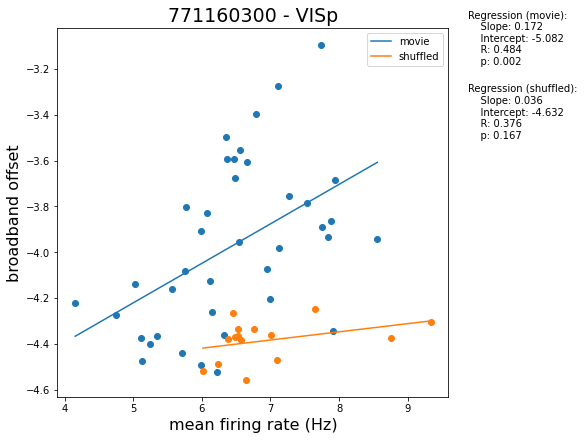

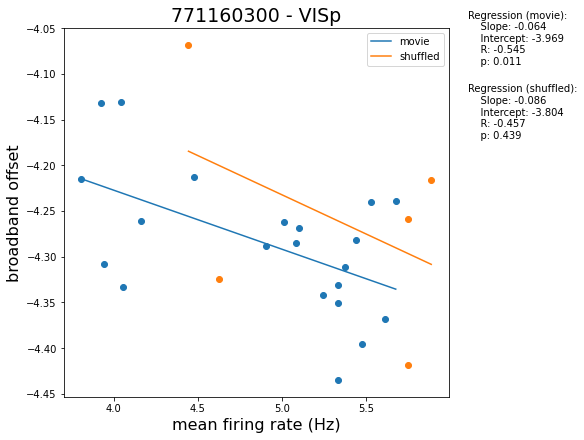

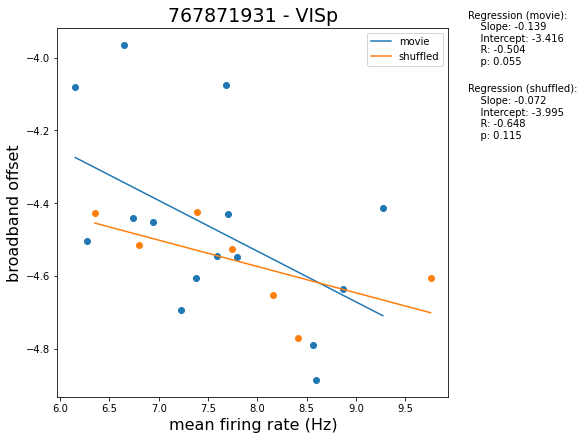

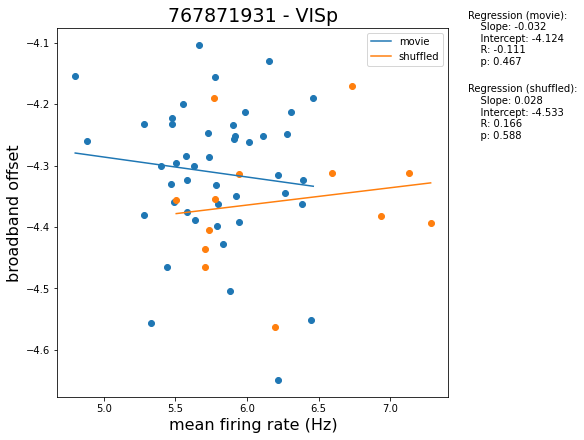

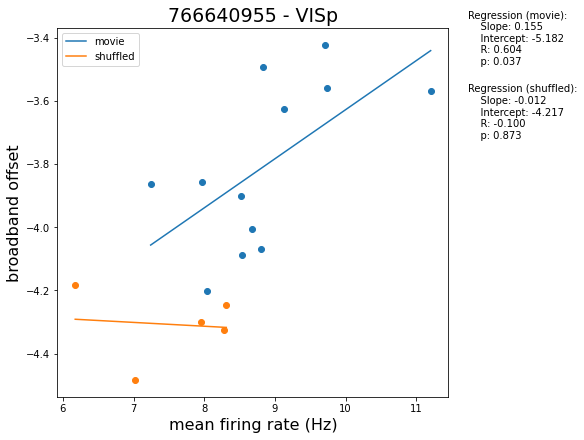

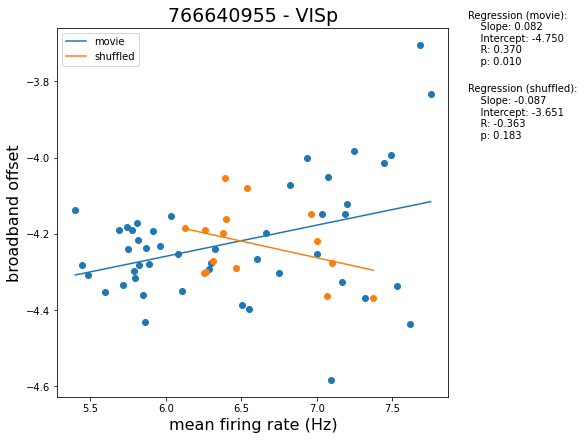

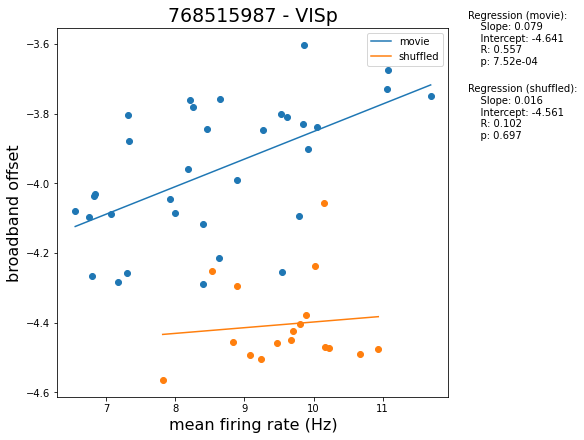

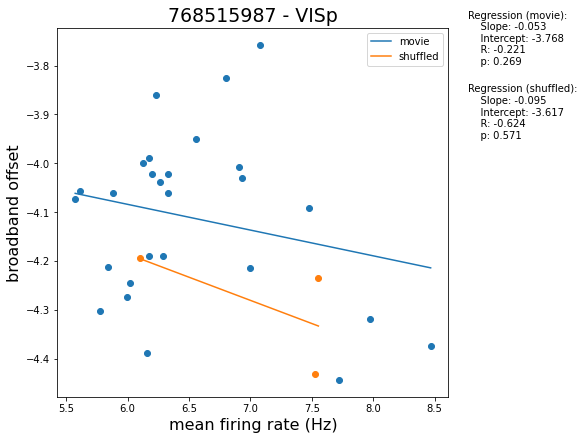

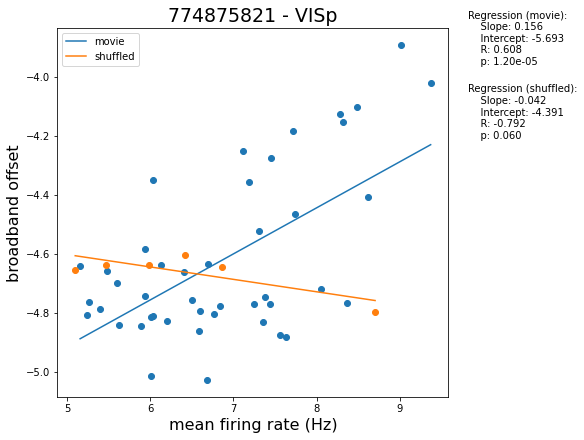

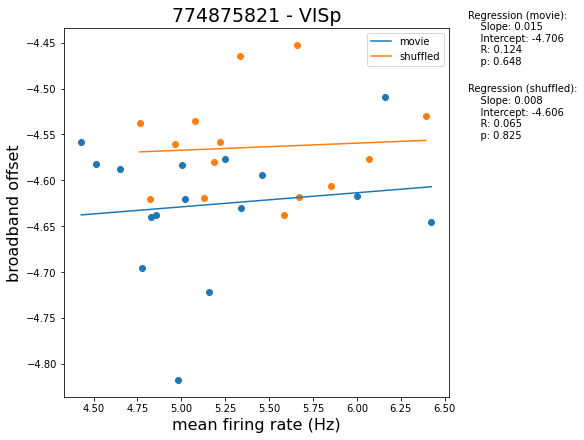

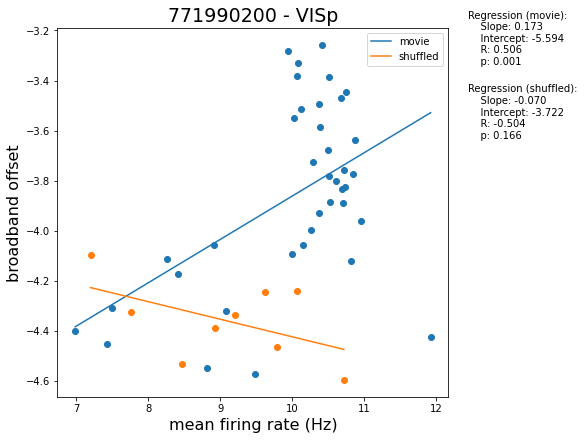

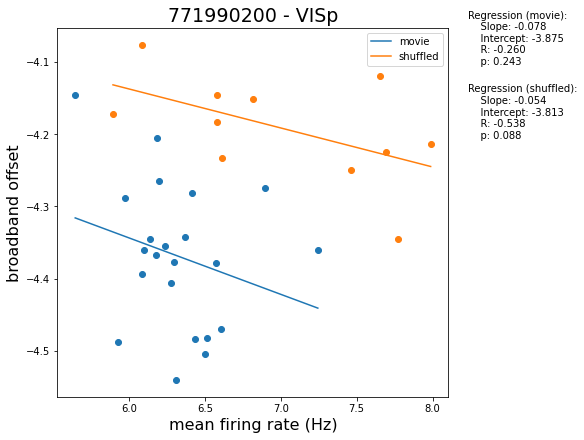

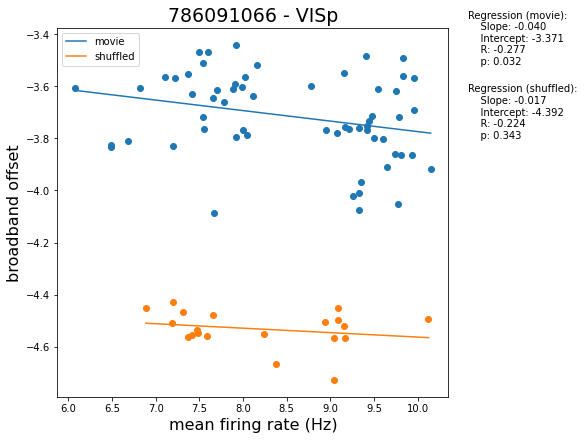

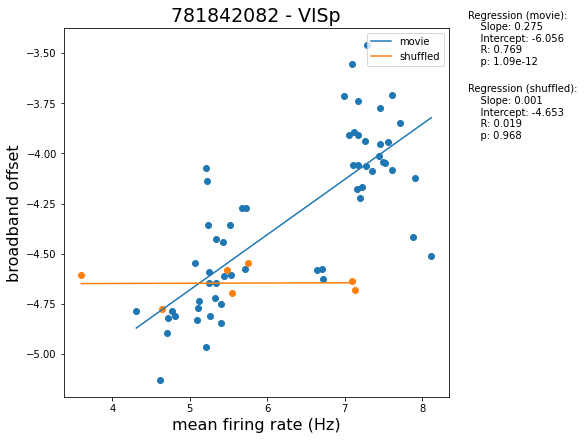

C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


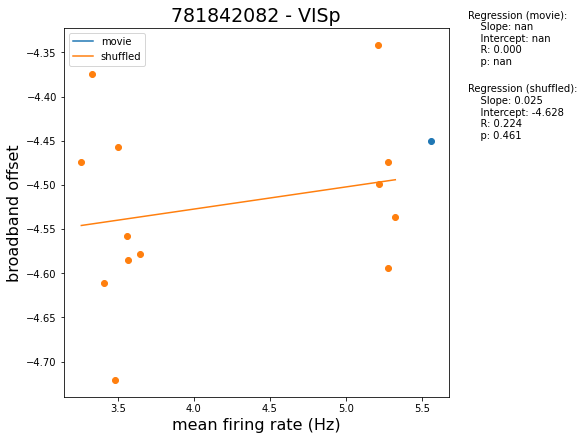

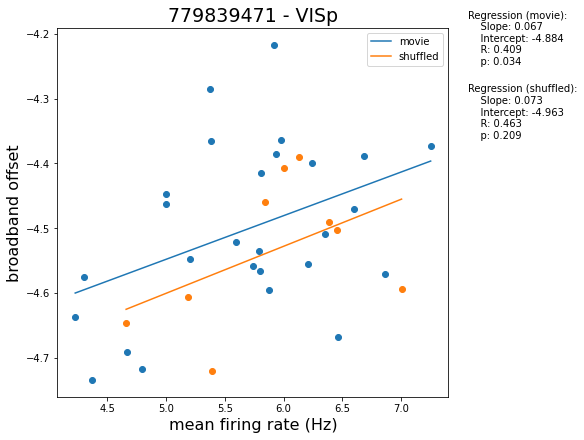

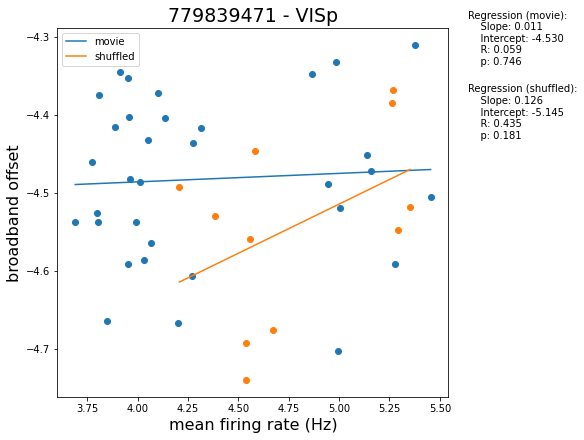

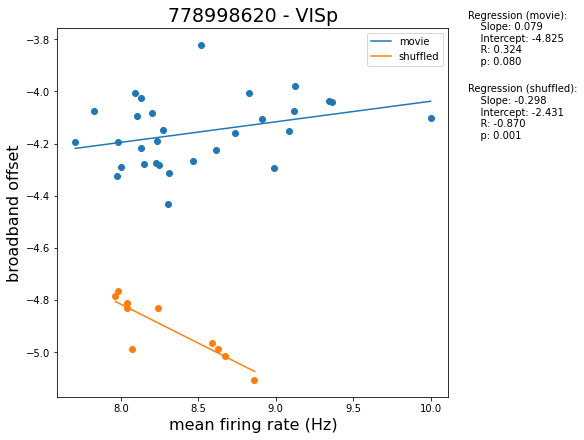

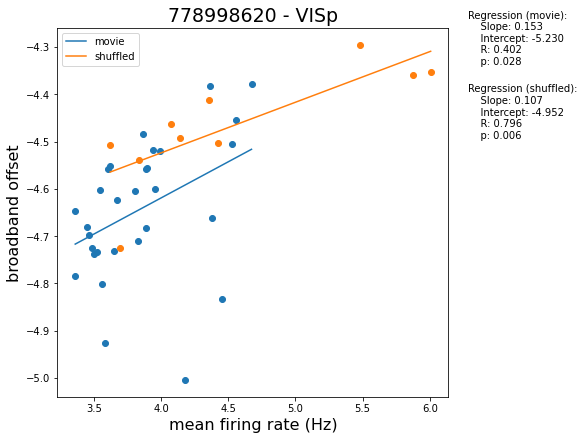

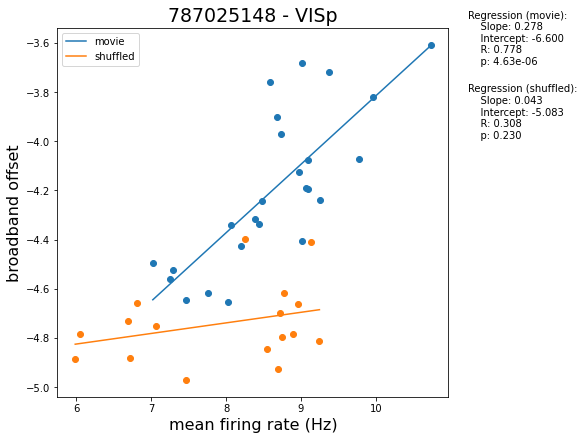

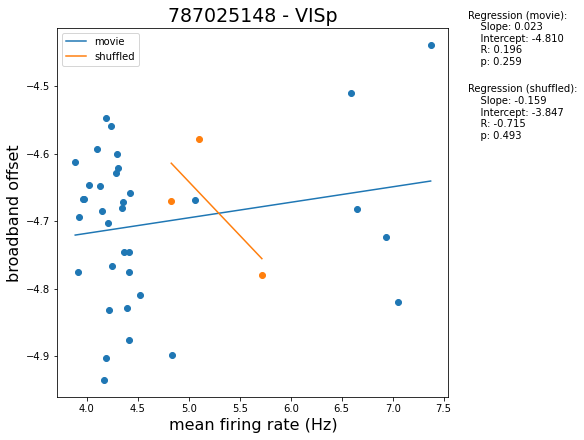

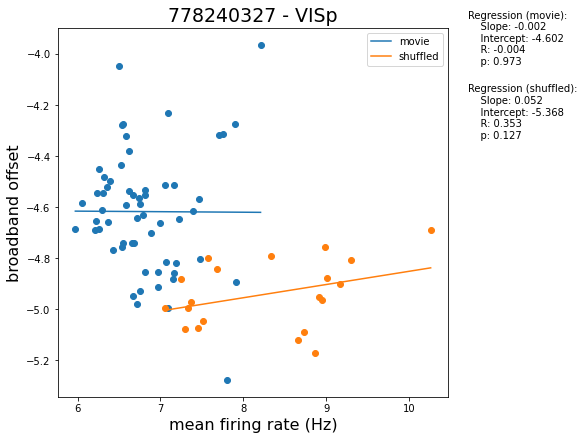

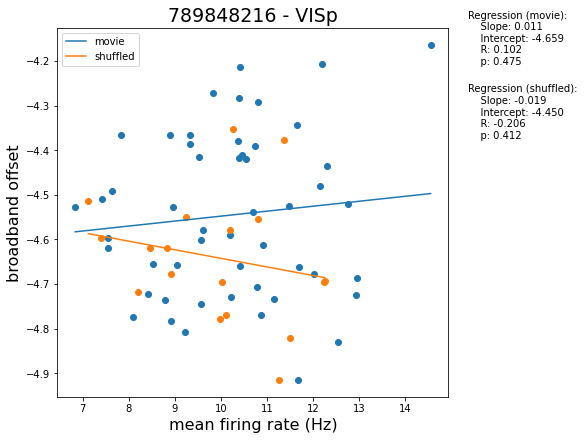

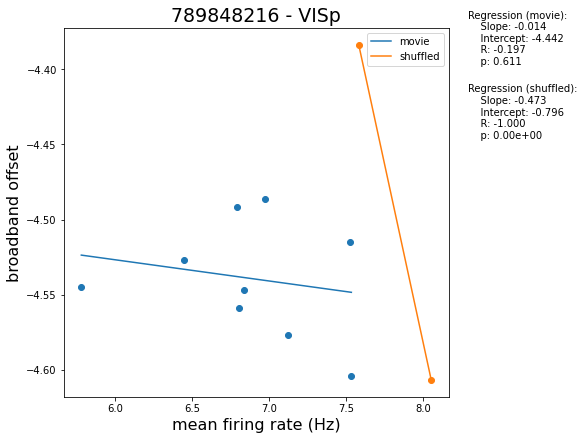

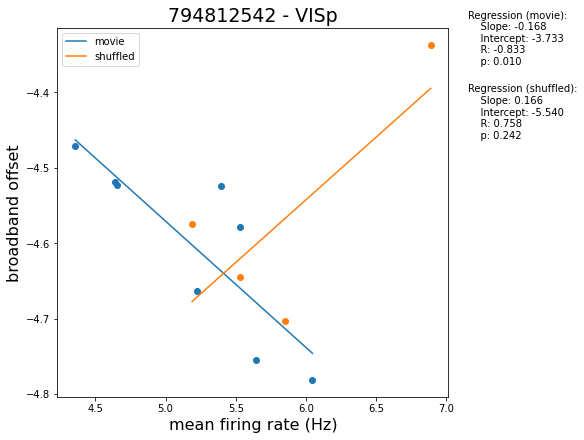

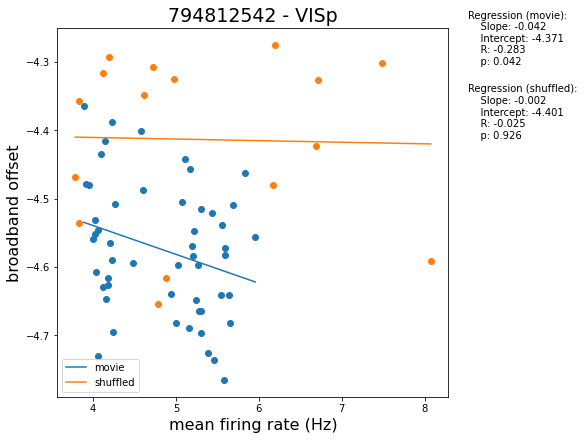

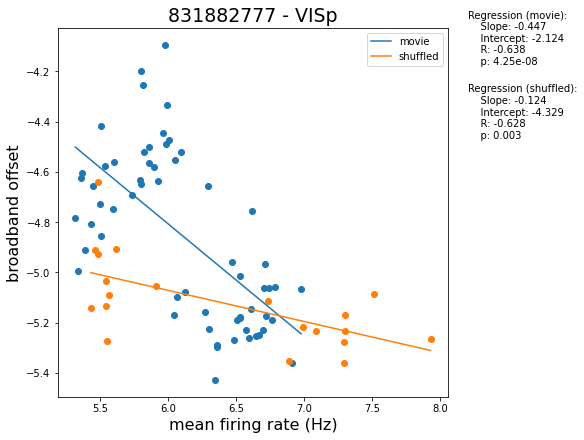

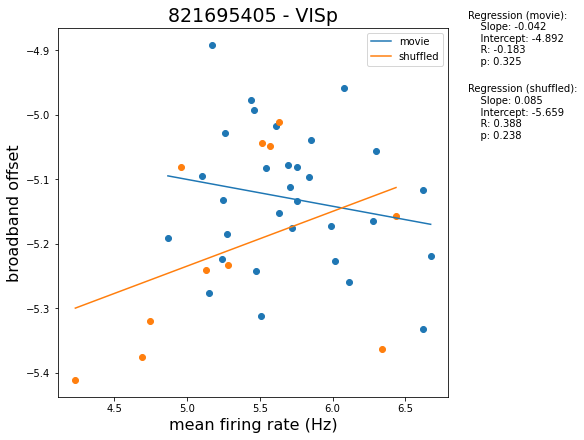

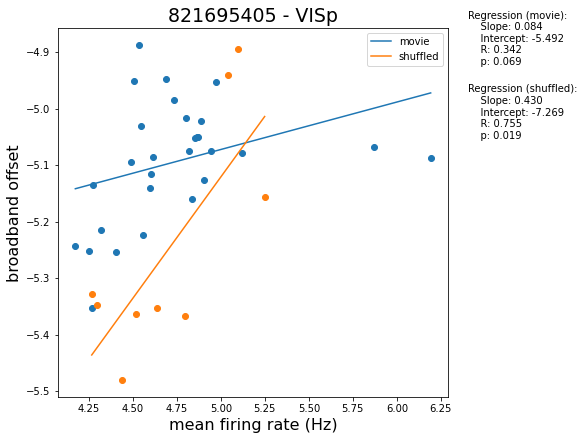

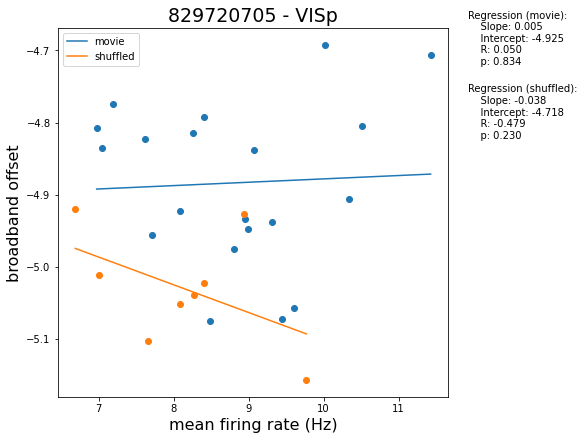

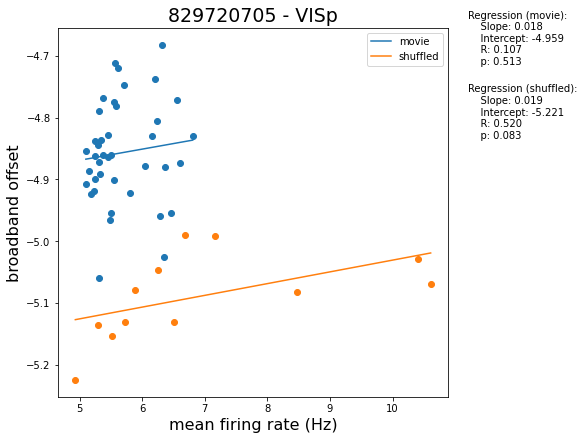

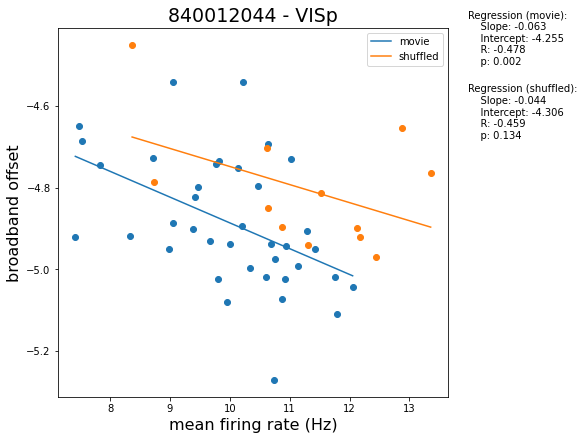

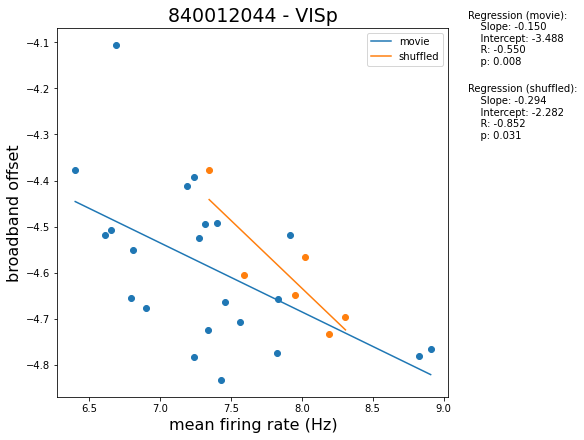

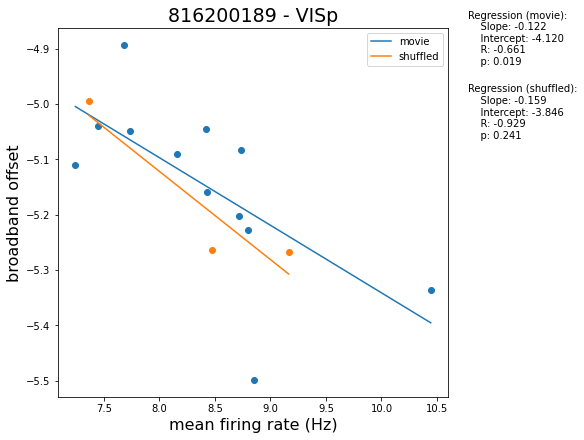

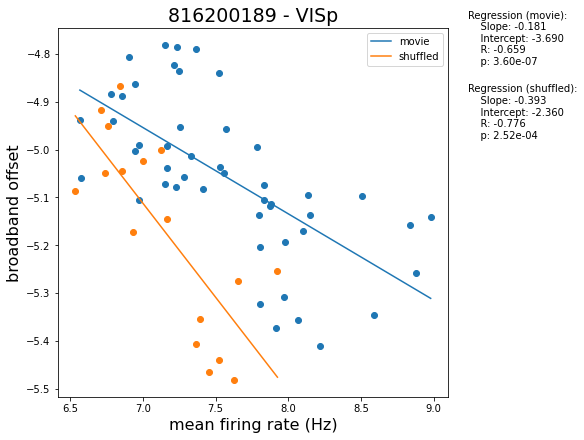

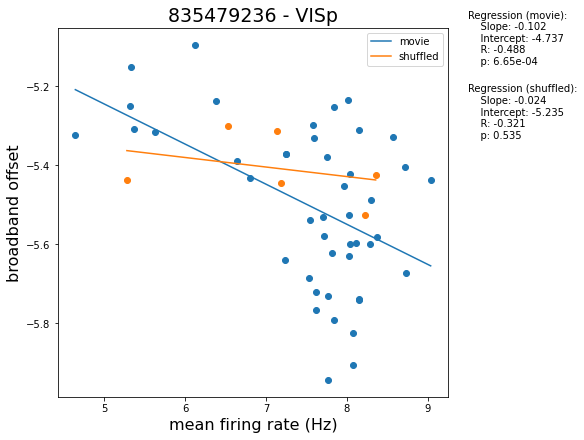

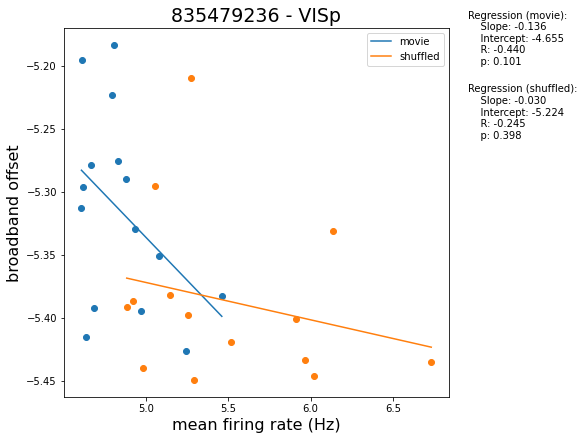

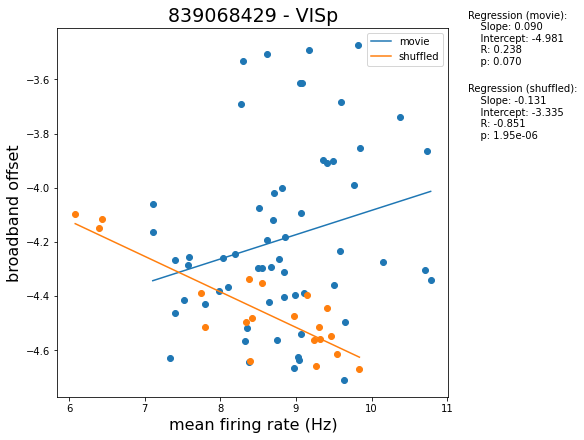

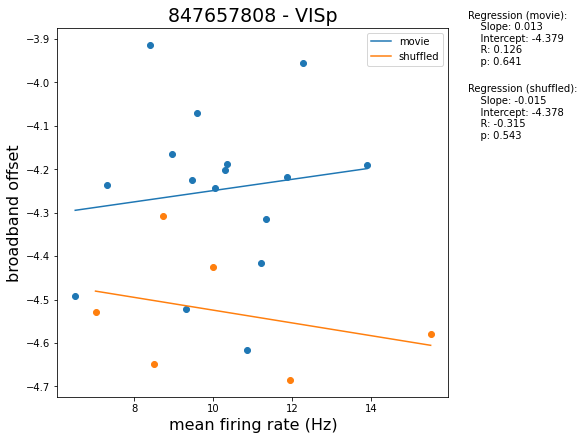

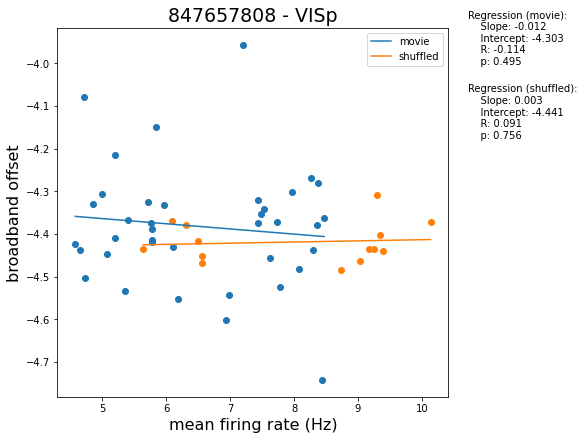

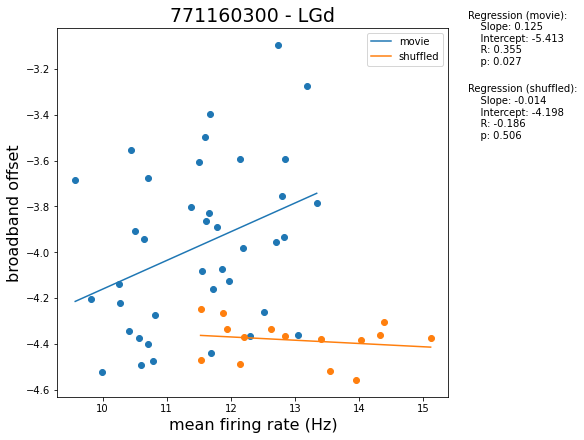

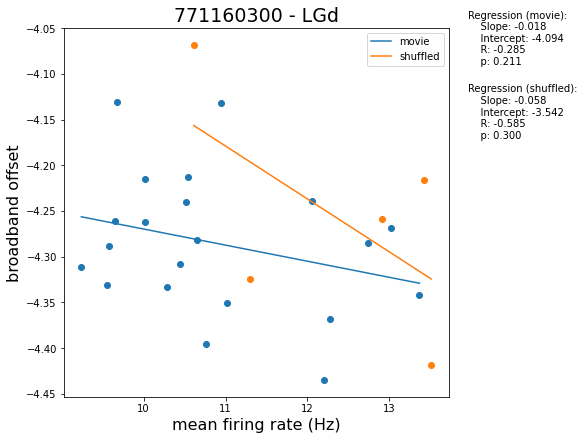

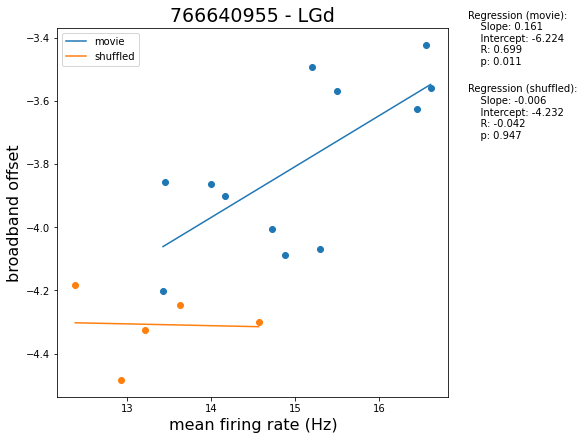

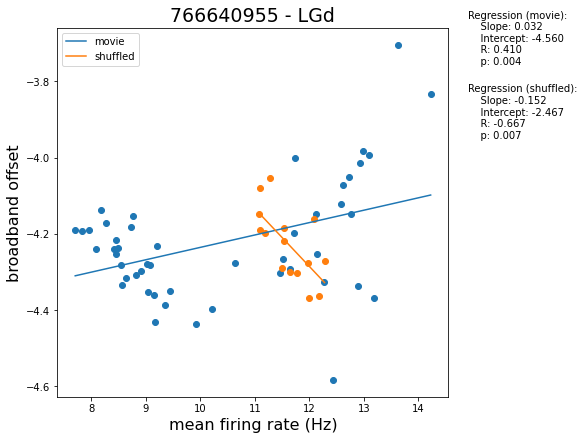

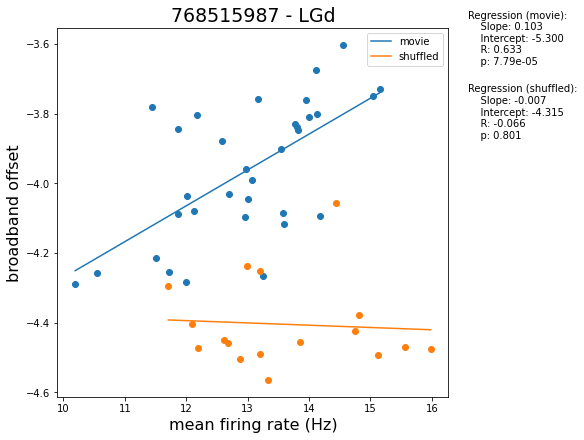

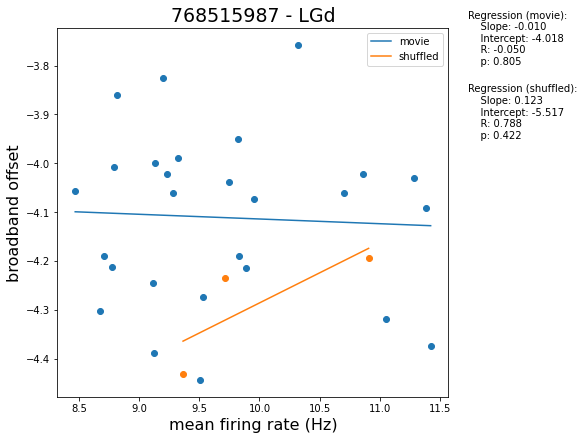

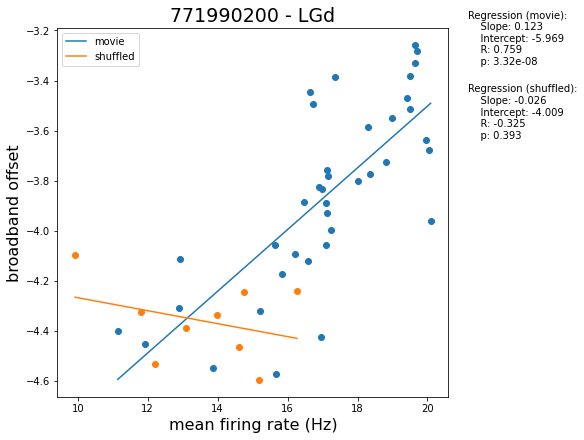

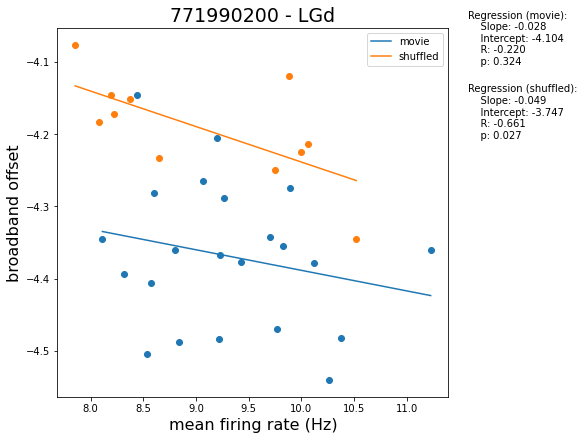

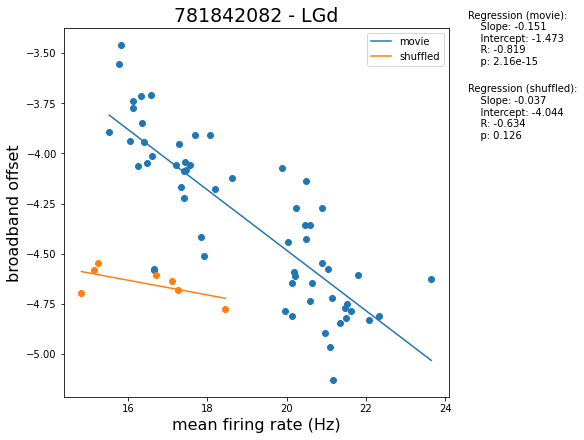

C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


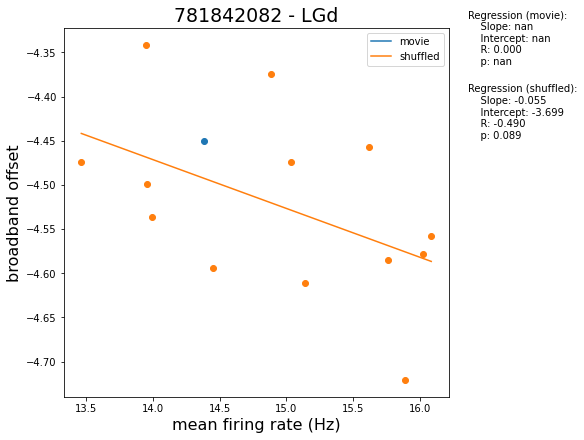

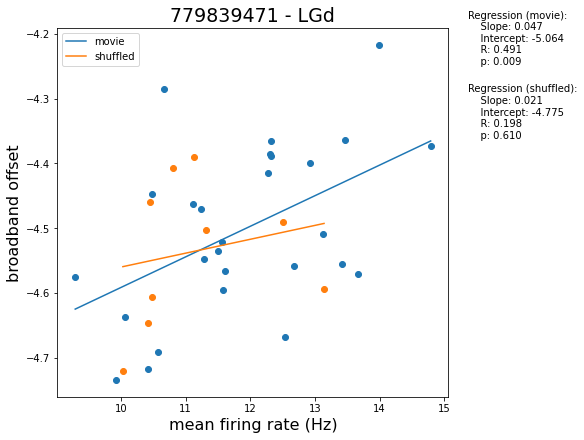

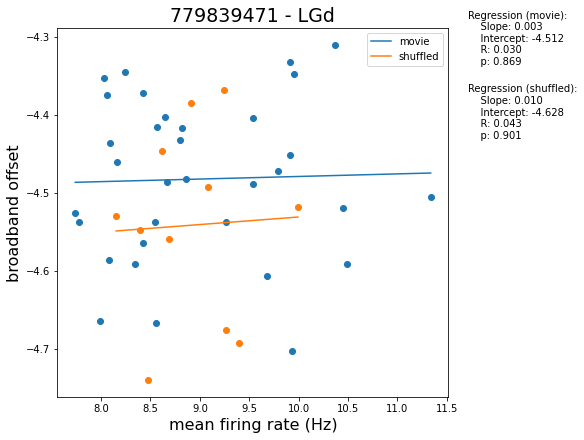

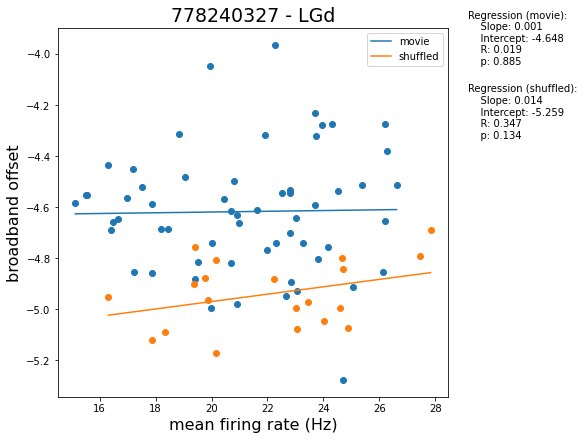

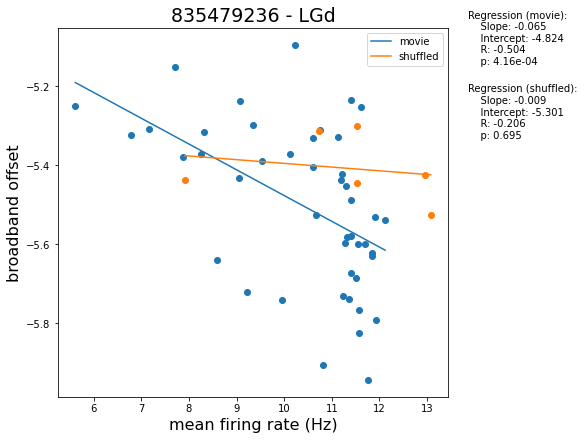

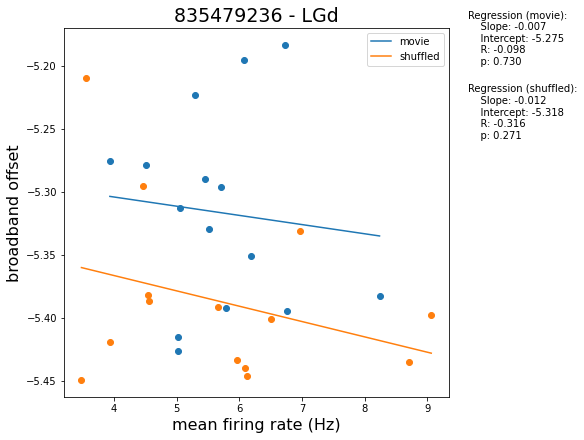

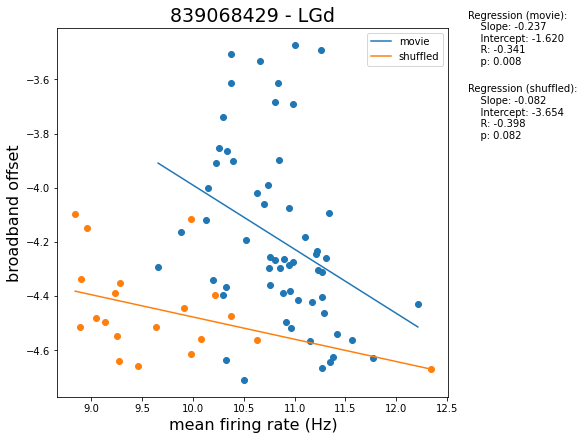

In [5]:
# loop through regions
regions = ['VISp', 'LGd']
for region in regions:
    # iterate over each session and join dataframes
    for ses_id in movie_spikes.get('session').unique():
        
        # if ses_id == 793224716 or ses_id not in movie_spikes\
        # [movie_spikes.get('brain_structure')==region].get('session').unique():
        #     continue
        
        # loop through behavioral conditions
        for behavior, running in zip(['running', 'stationary'], [True, False]):
        
            # create directory to save figures
            dir_figures = f"{PROJECT_PATH}/figures/offset_vs_rate/{region}/{behavior}"
            if not os.path.exists(f"{dir_figures}"):
                os.makedirs(f"{dir_figures}")
                
            # combine dfs with average across channels
            movie_lfp_sync = combine_spike_lfp_dfs(movie_spikes, movie_lfp, ses_id, region, state=running)
            
            # create plots
            x_movie = movie_lfp_sync.get('mean_firing_rate')
            y_movie = movie_lfp_sync.get('offset')

            # repeat for shuffled data
            shuffled_lfp_sync = combine_spike_lfp_dfs(shuffled_spikes, shuffled_lfp, ses_id, region, state=running)

            x_shuffled = shuffled_lfp_sync.get('mean_firing_rate')
            y_shuffled = shuffled_lfp_sync.get('offset')
            
            # skip if no data
            if len(movie_lfp_sync)==0 or len(shuffled_lfp_sync)==0:
                continue
                
            # create scatter plot
            scatter_2_conditions(x_movie, y_movie, x_shuffled, y_shuffled, 
                                 conditions=['movie', 'shuffled'],
                                 title=f"{ses_id} - {region}", 
                                 xlabel="mean firing rate (Hz)", 
                                 ylabel="broadband offset", 
                                 fname_out = f"{dir_figures}/{ses_id}_{region}",
                                 show=True);

#### Population Spike-distance v LFP spectral exponent

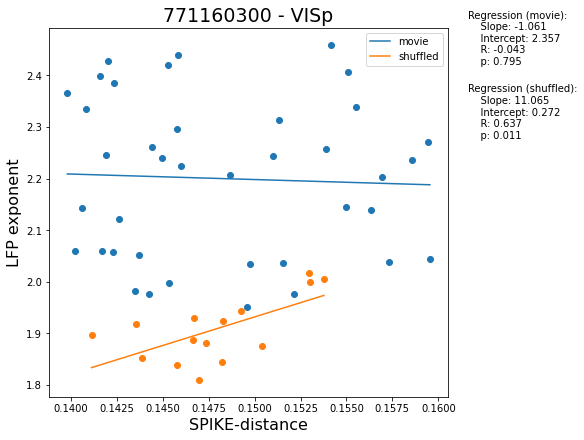

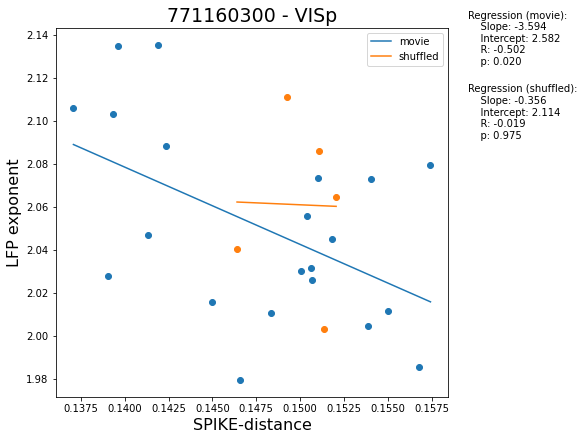

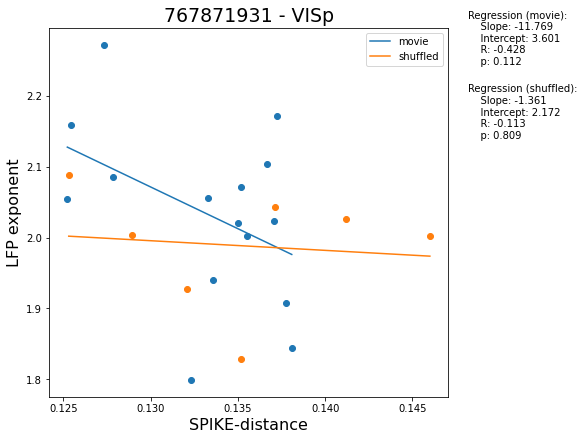

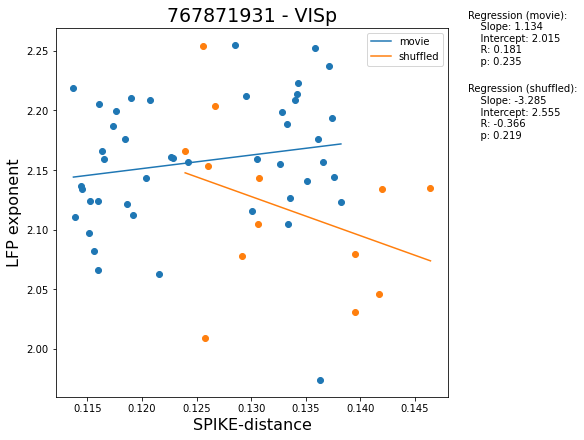

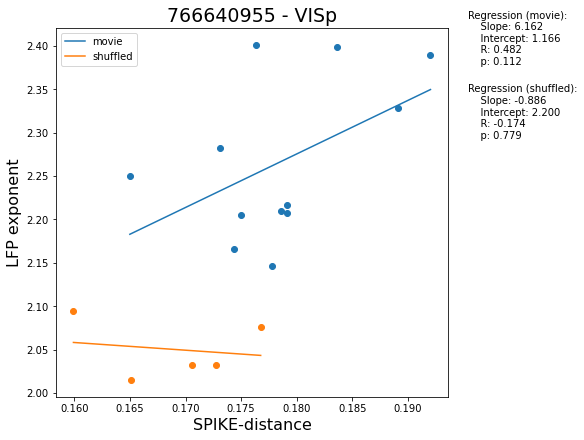

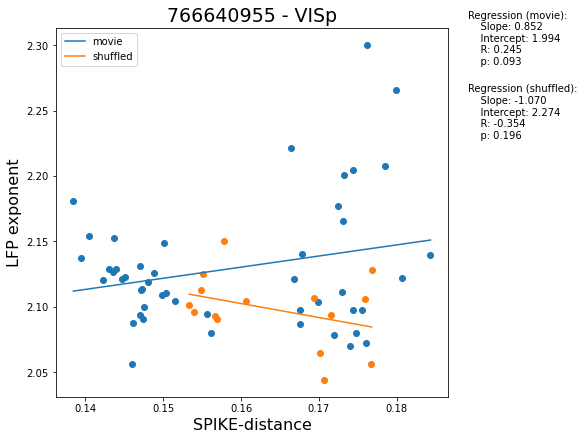

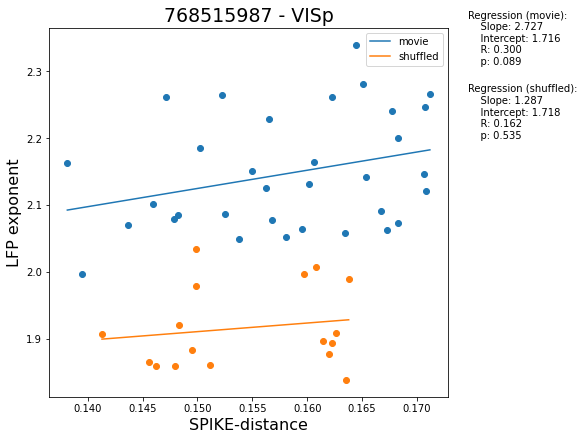

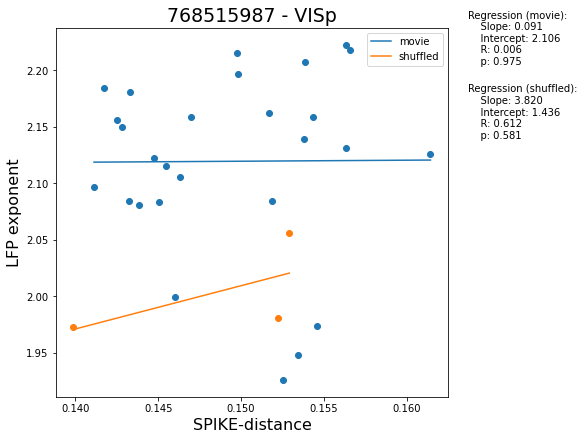

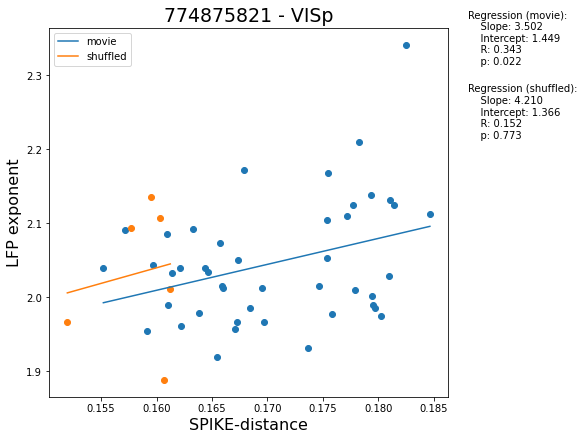

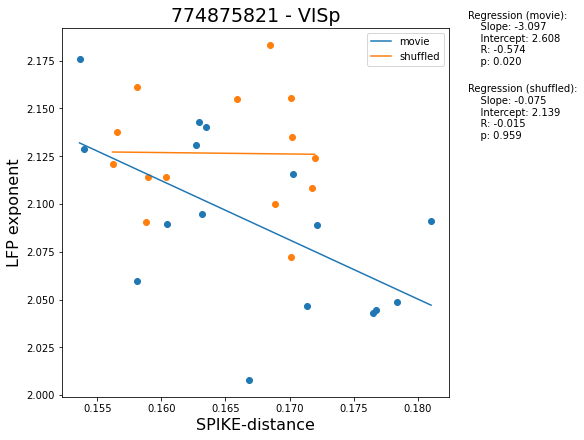

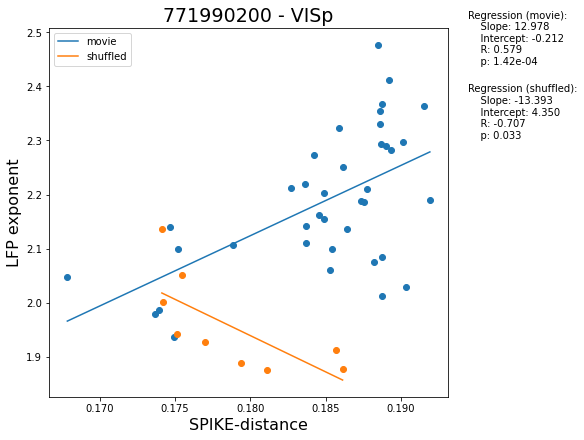

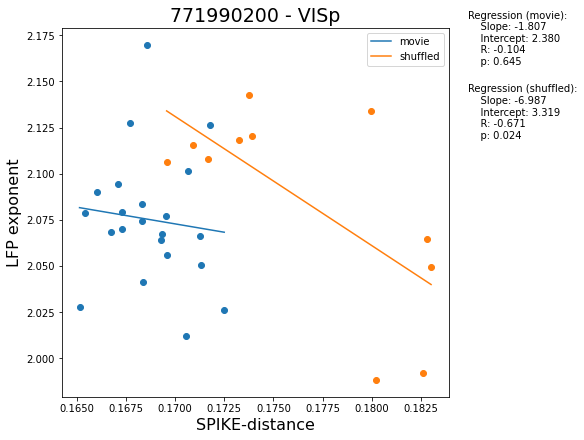

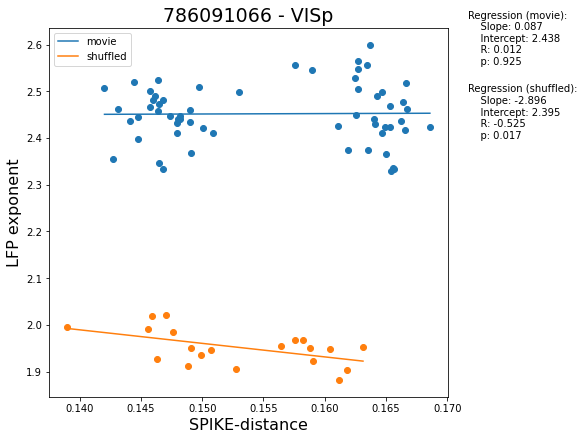

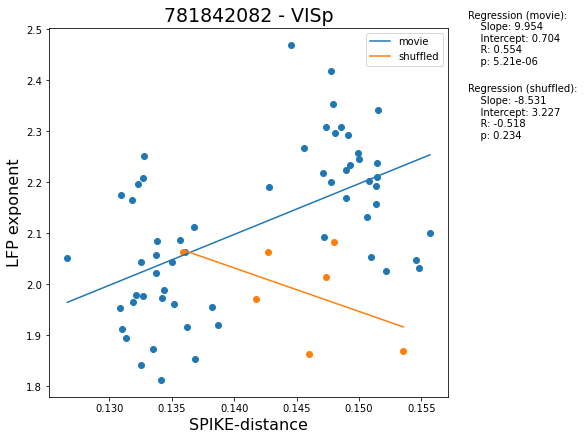

C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


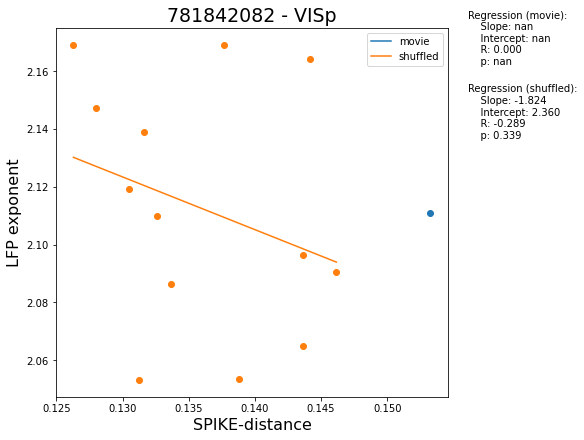

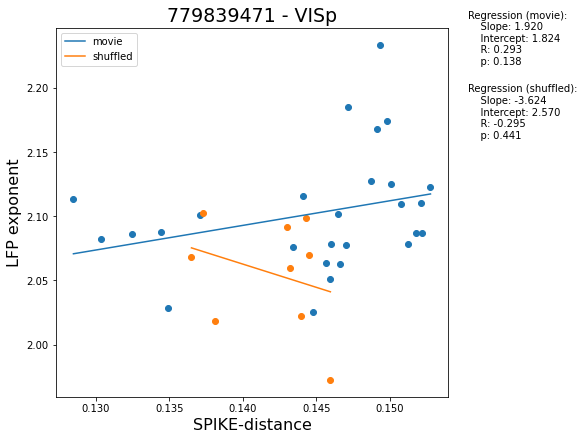

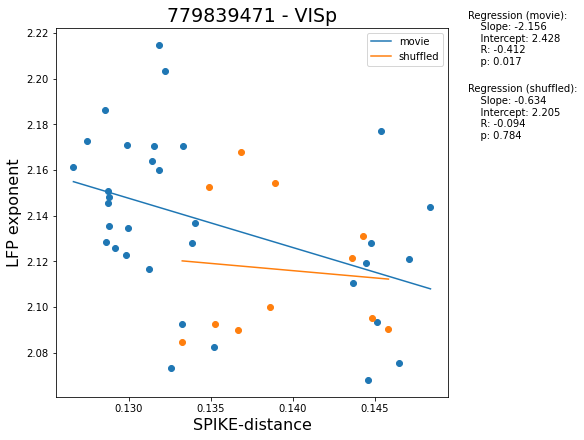

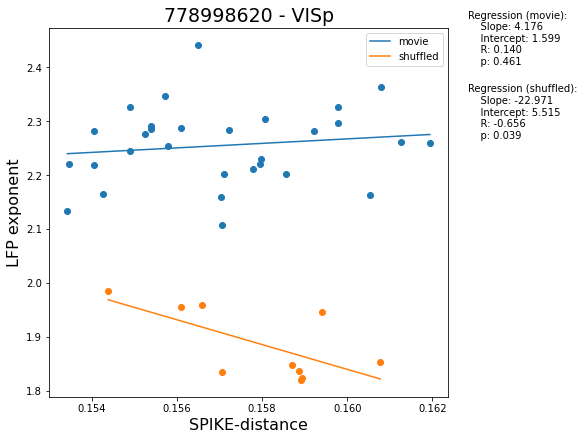

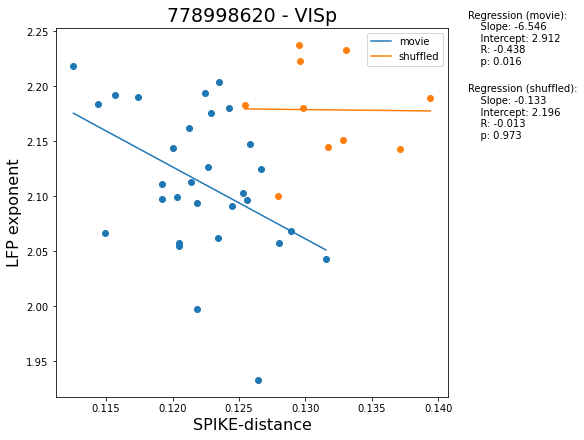

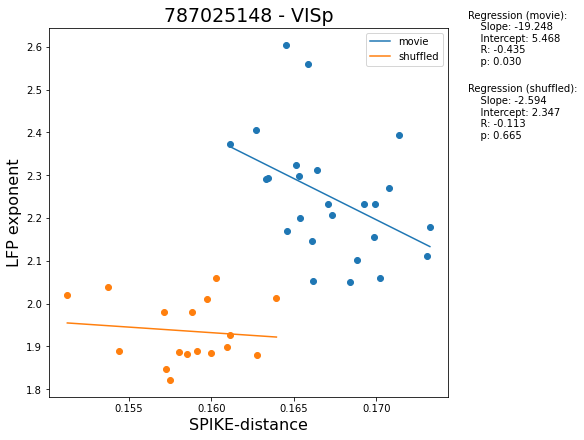

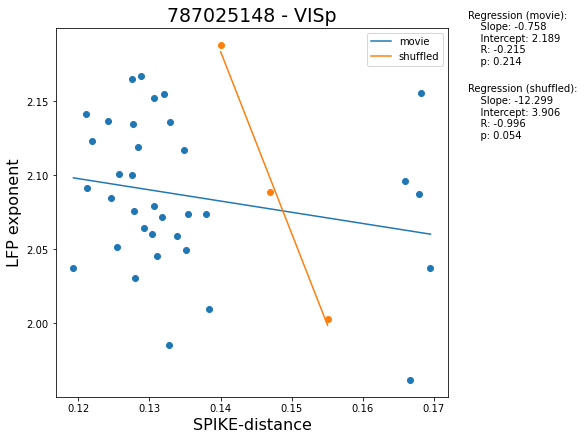

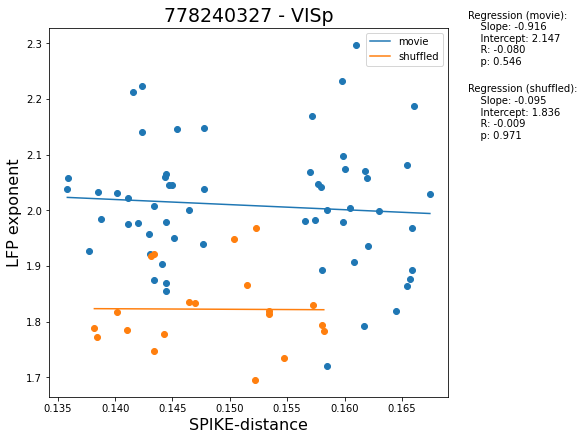

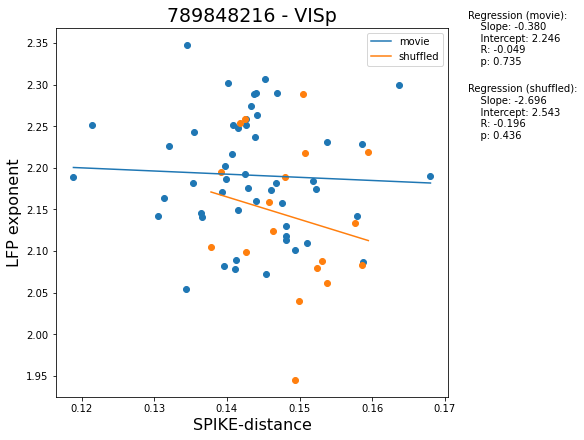

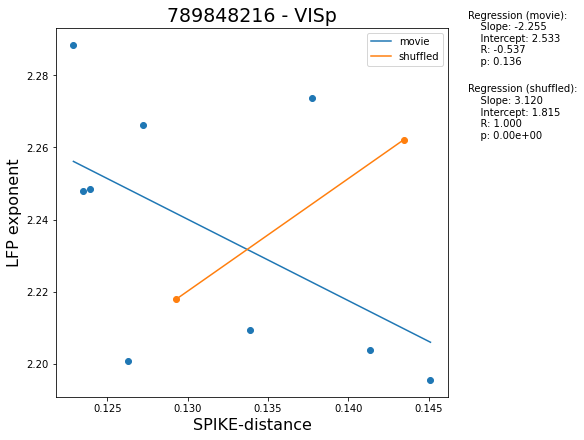

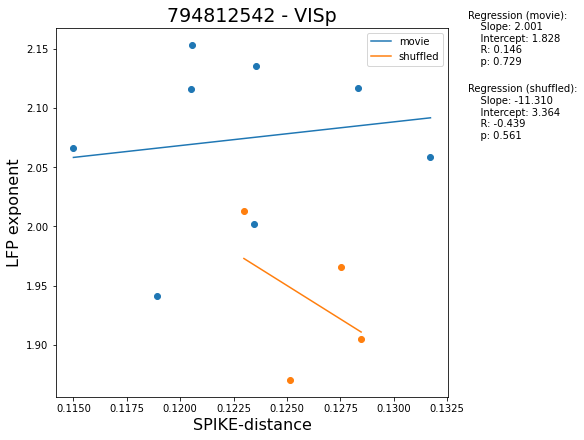

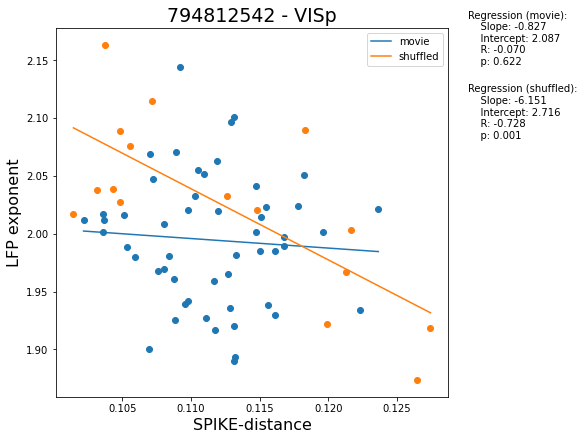

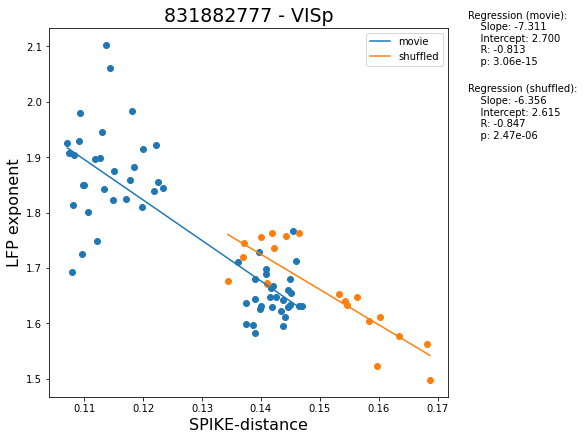

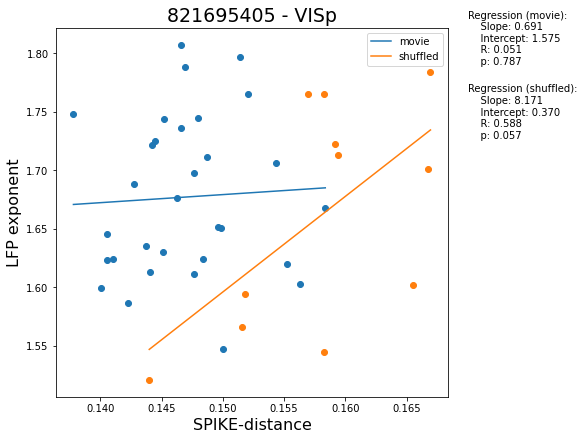

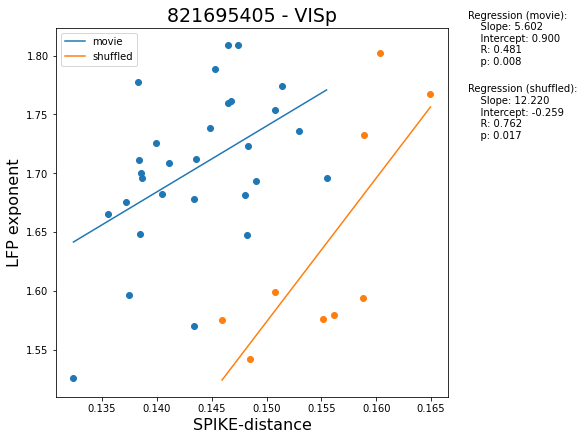

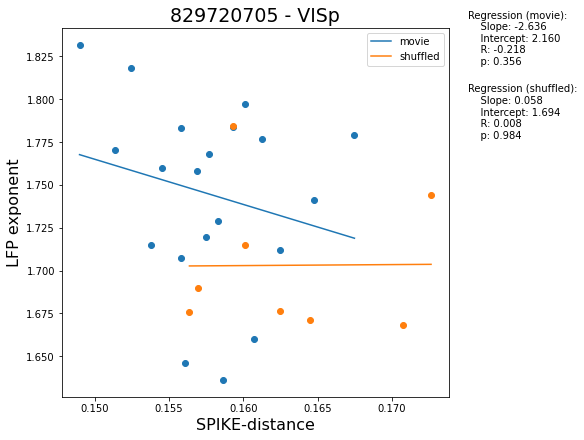

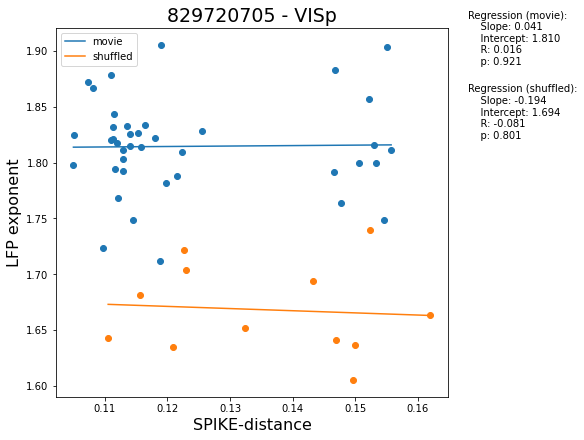

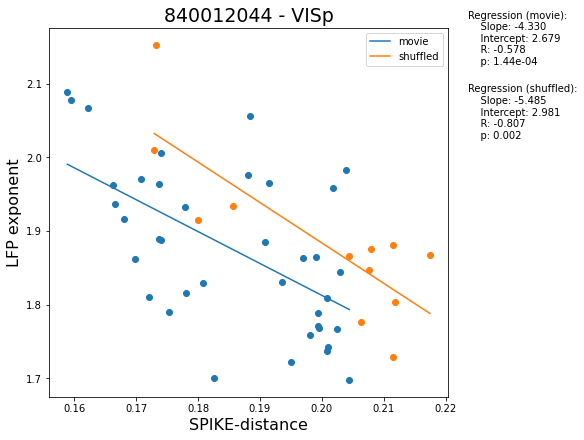

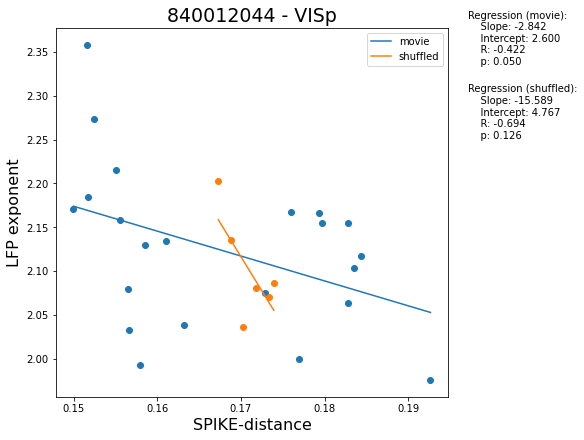

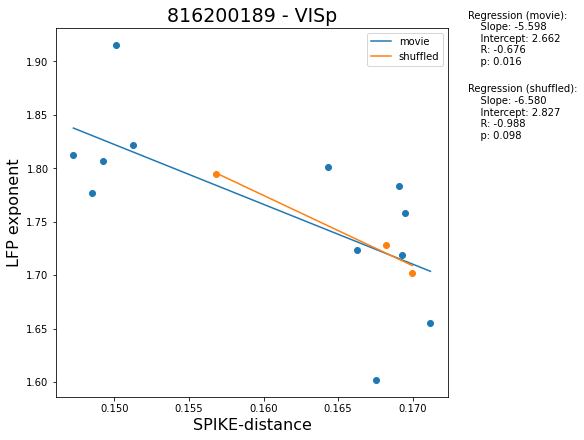

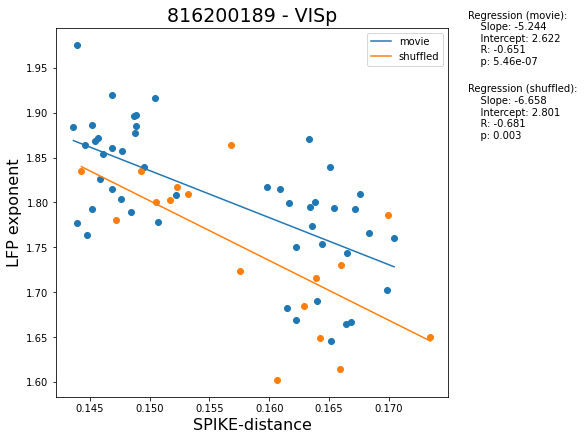

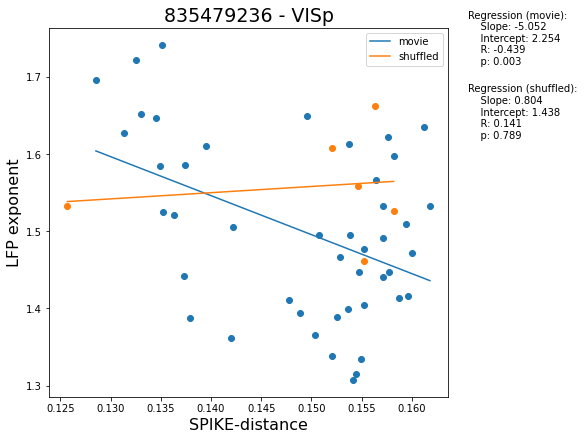

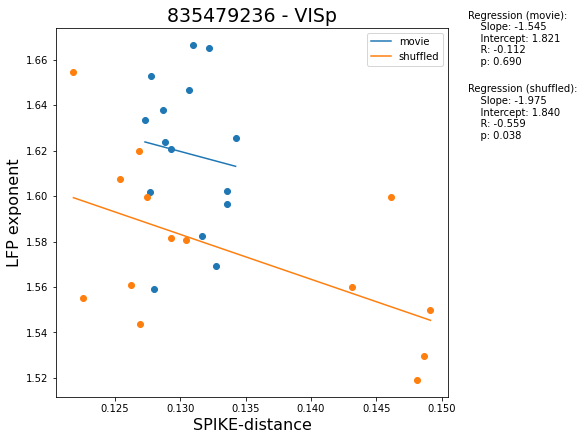

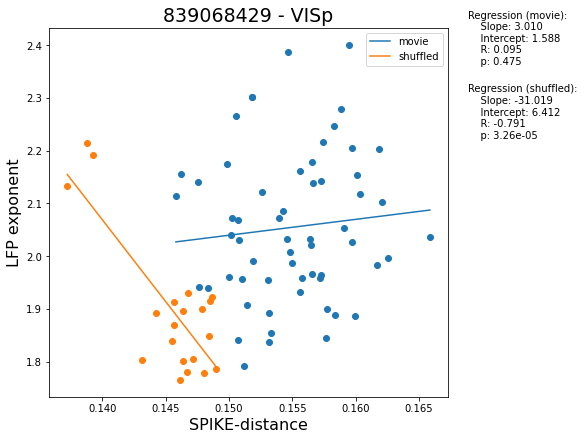

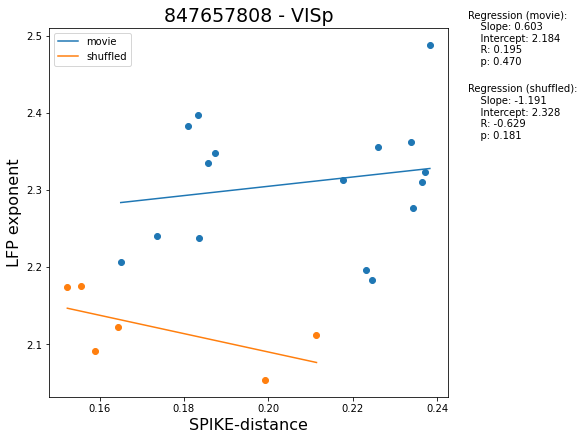

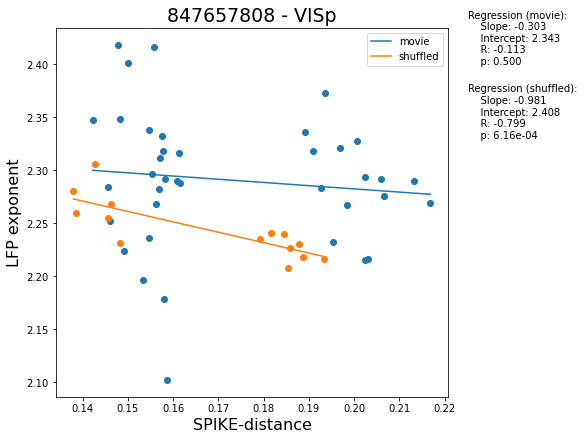

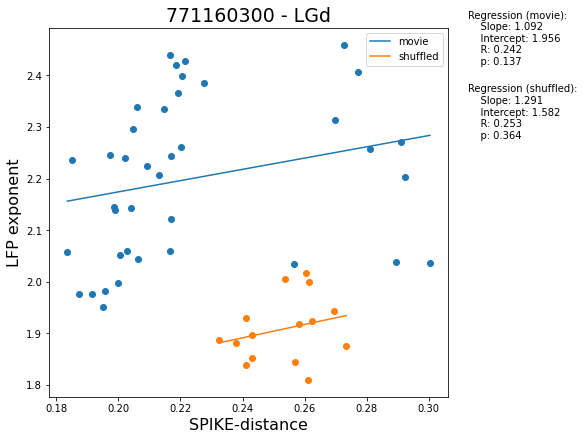

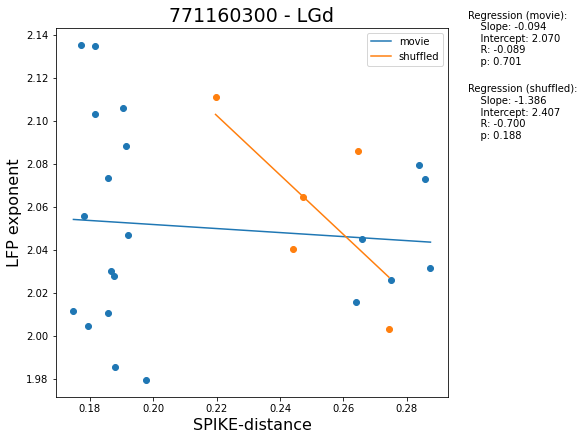

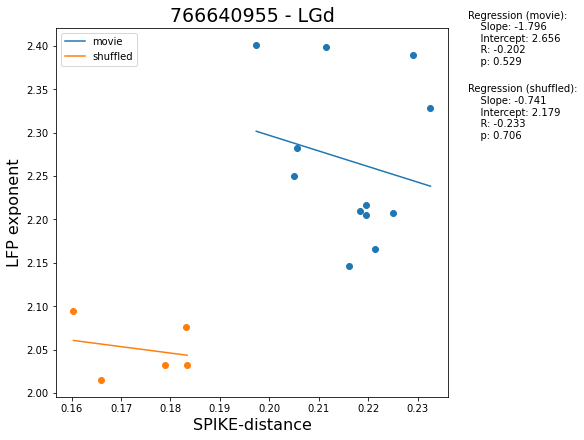

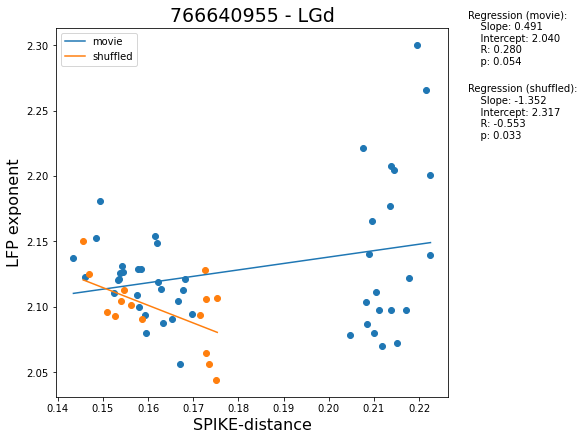

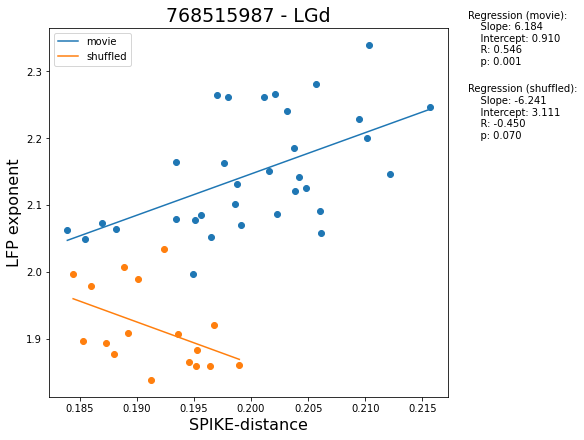

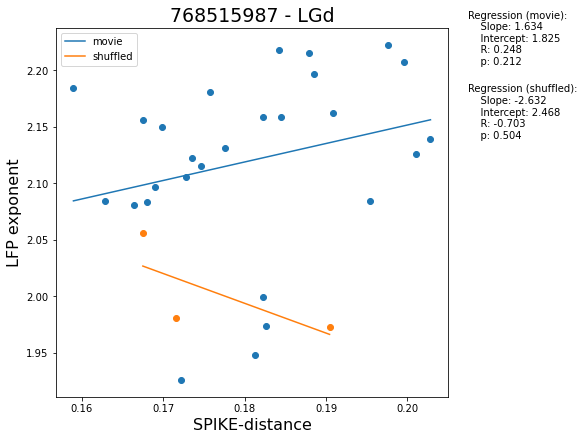

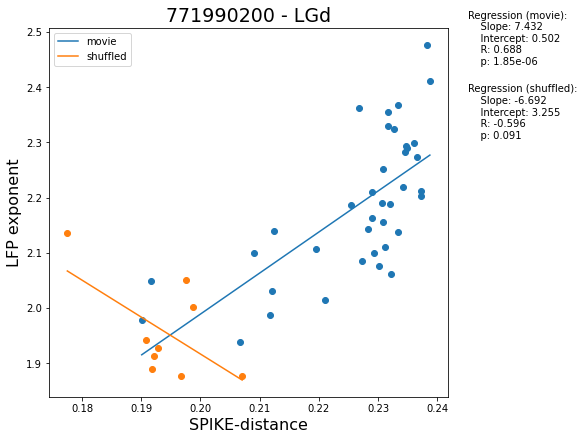

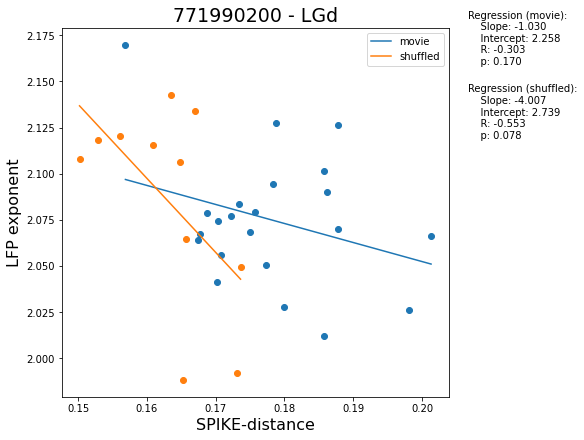

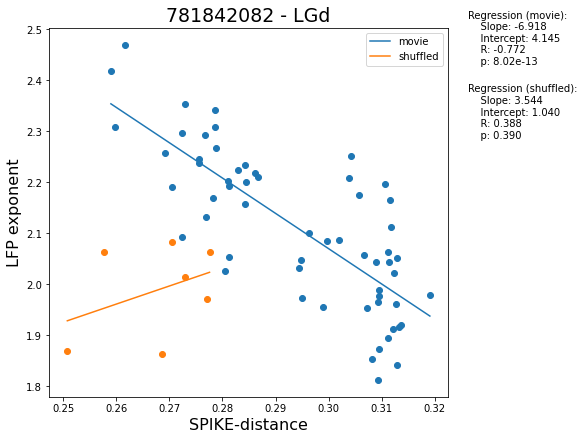

C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


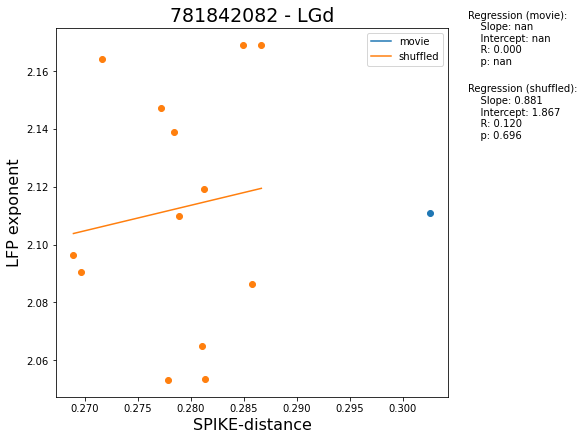

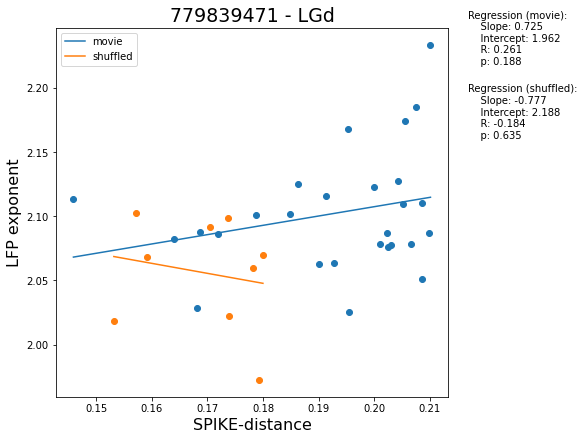

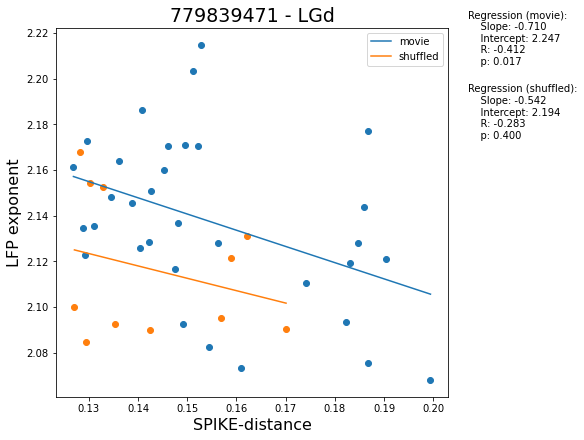

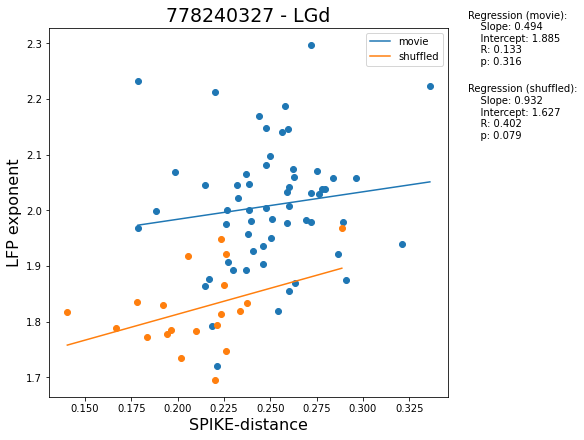

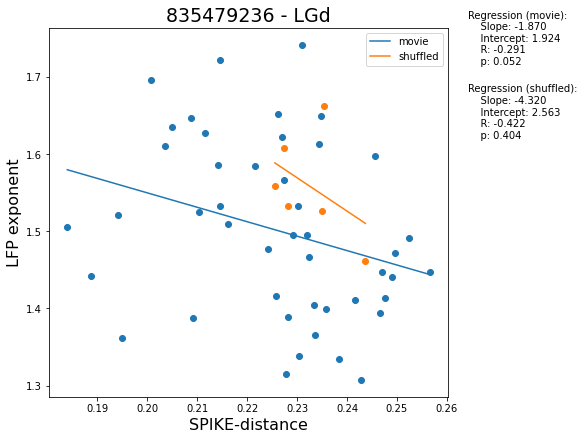

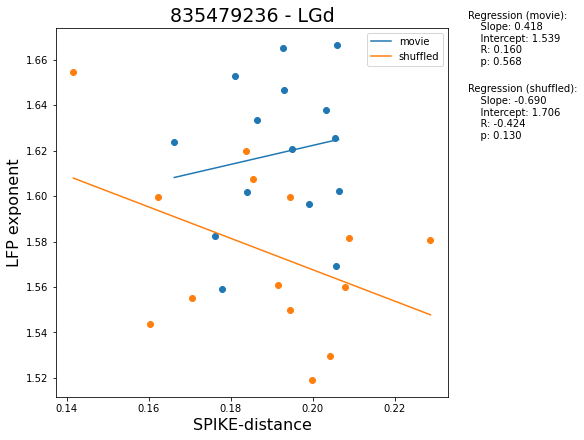

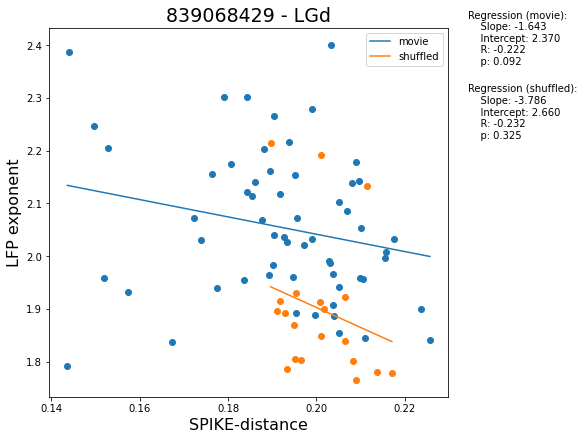

In [6]:
# loop through regions
regions = ['VISp','LGd']
for region in regions:
    # iterate over each session and join dataframes
    for ses_id in movie_spikes.get('session').unique():
        
        # if ses_id == 793224716 or ses_id not in movie_spikes\
        # [movie_spikes.get('brain_structure')==region].get('session').unique():
        #     continue
        
        # loop through behavioral conditions
        for behavior, running in zip(['running', 'stationary'], [True, False]):
        
            # create directory to save figures
            dir_figures = f"{PROJECT_PATH}/figures/exponent_vs_synchrony/{region}/{behavior}"
            if not os.path.exists(f"{dir_figures}"):
                os.makedirs(f"{dir_figures}")

            # combine dfs with average across channels
            movie_lfp_sync = combine_spike_lfp_dfs(movie_spikes, movie_lfp, ses_id, region, state=running)
            
            # create plots
            x_movie = movie_lfp_sync.get('spike_synchrony')
            y_movie = movie_lfp_sync.get('exponent')

            # repeat for shuffled data
            shuffled_lfp_sync = combine_spike_lfp_dfs(shuffled_spikes, shuffled_lfp, ses_id, region, state=running)

            x_shuffled = shuffled_lfp_sync.get('spike_synchrony')
            y_shuffled = shuffled_lfp_sync.get('exponent')
            
            if len(movie_lfp_sync)==0 or len(shuffled_lfp_sync)==0:
                continue
                
            # create scatter plot
            scatter_2_conditions(x_movie, y_movie, x_shuffled, y_shuffled, 
                                 conditions=['movie', 'shuffled'],
                                 title=f"{ses_id} - {region}", 
                                 xlabel="SPIKE-distance", 
                                 ylabel="LFP exponent", 
                                 fname_out = f"{dir_figures}/{ses_id}_{region}",
                                 show=True);

#### All session mean firing rate vs. broadband offset 

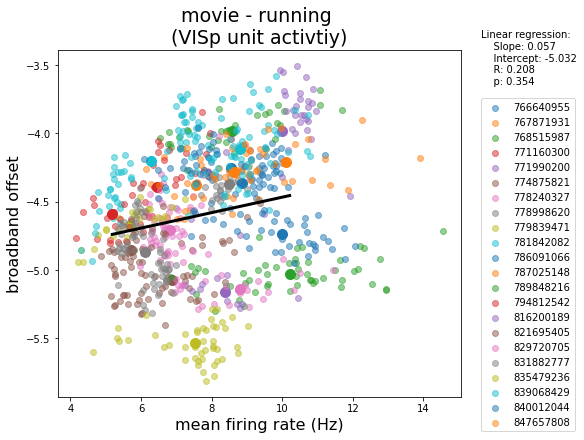

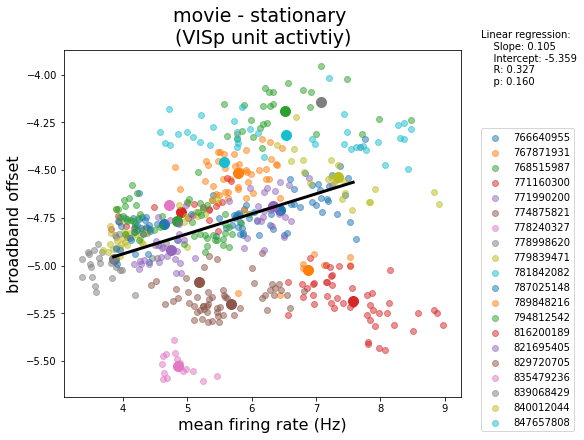

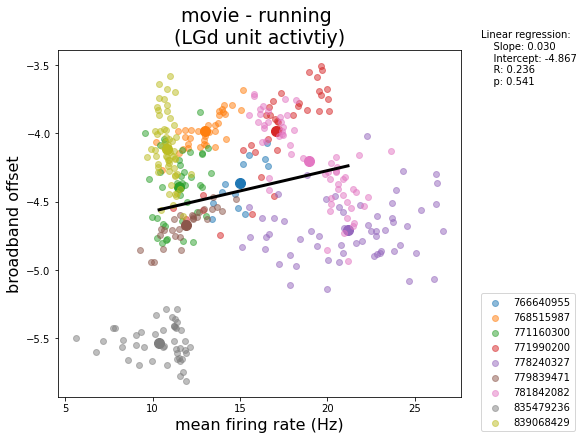

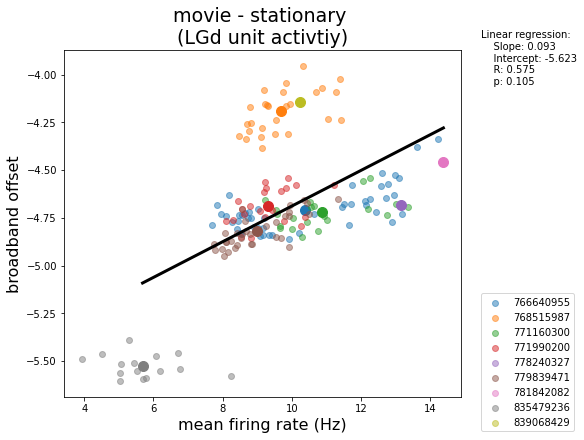

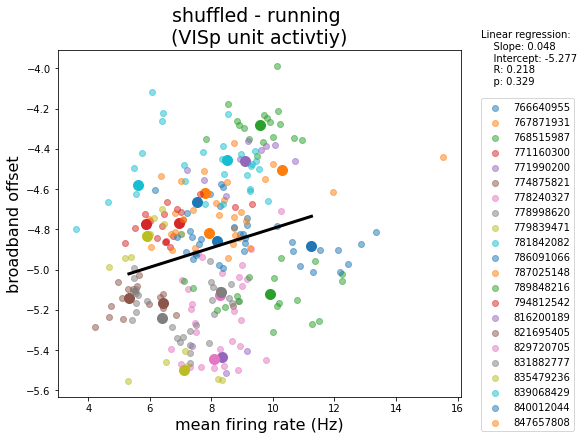

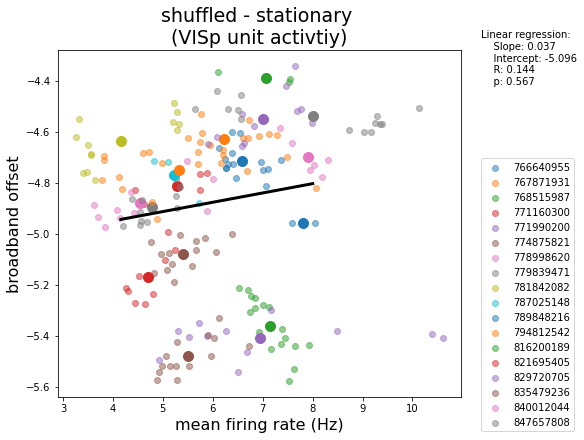

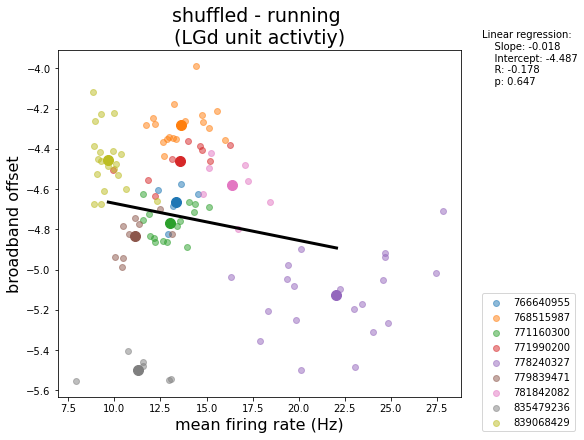

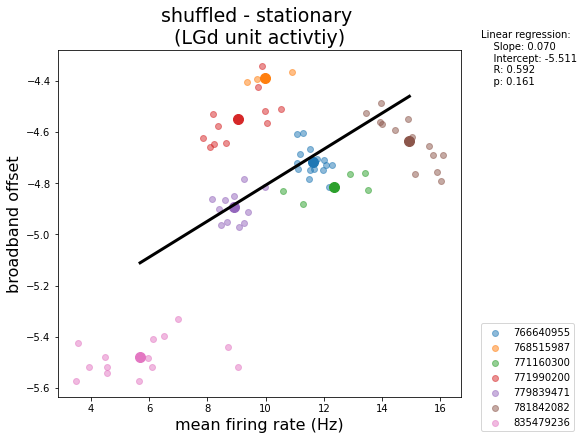

In [7]:
# loop through stimuli
for stimulus, df_lfp, df_units in zip(['movie', 'shuffled'], 
                                      [movie_lfp, shuffled_lfp],
                                      [movie_spikes, shuffled_spikes]):
    # modify df_lfp - average over channels for each epoch within each session
    df_lfp_i = df_lfp.groupby(['session', 'epoch_idx']).mean().reset_index()

    # loop through spiking region
    for spike_region in ['VISp', 'LGd']:
        # get unit data for this region
        df_units_i = df_units[df_units.get("brain_structure")==spike_region]  

        # merge unit and lfp dataframes
        df_i = df_lfp_i.merge(df_units_i, on=['session', 'epoch_idx'])

        # loop through behavioral conditions
        for behavior, running in zip(['running', 'stationary'], [True, False]):

            # filter df by behavior
            df = df_i[df_i.get('running')==running]
            
            # plot each session
            sessions = df.get('session').unique()
            fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
            fig.patch.set_facecolor('white')
            for ses in sessions:
                ses_df = df[df.get('session')==ses]

                # plot each epoch
                sc =  ax.scatter(ses_df.get('mean_firing_rate'), 
                                 ses_df.get('offset'), label=ses)

                # plot session mean
                ax.scatter(ses_df.get('mean_firing_rate').mean(), 
                           ses_df.get('offset').mean(), color=sc.get_facecolors()[0], s=100)
                sc.set_alpha(0.5)
                
            # run regression across all epochs and plot results
            df_avg = df.groupby(['session']).mean().reset_index()# average across trials
            x_data = df_avg.get('mean_firing_rate')
            y_data = df_avg.get('offset')
            results = sts.linregress(x_data, y_data)
            l1 = np.linspace(min(x_data), max(x_data), 1000)
            t1 = results.slope * l1 + results.intercept
            ax.plot(l1, t1, color='k', linewidth=3)

            # add regression results text
            if results.pvalue < 0.001:
                pval = f"{results.pvalue:.2e}"
            else:
                pval = f"{results.pvalue:.3f}"
            plt.text(1.05, 0.9, 
                    f"Linear regression:\n" +
                    f"    Slope: {results.slope:.3f}\n" +
                    f"    Intercept: {results.intercept:.3f}\n" +
                    f"    R: {results.rvalue:.3f}\n" +
                    f"    p: {pval}", transform = ax.transAxes)

            # label
            ax.legend(bbox_to_anchor=(1.05, -.1), loc='lower left', borderaxespad=0.)
            plt.xlabel("mean firing rate (Hz)")
            plt.ylabel("broadband offset")
            plt.title(f"{stimulus} - {behavior} \n({spike_region} unit activtiy)")
            
            # save
            dir_figures = f"{PROJECT_PATH}/figures/offset_vs_rate/{spike_region}/{behavior}"
            plt.savefig(f"{dir_figures}/all_sessions")

#### All session SPIKE-distance vs. LFP exponent 

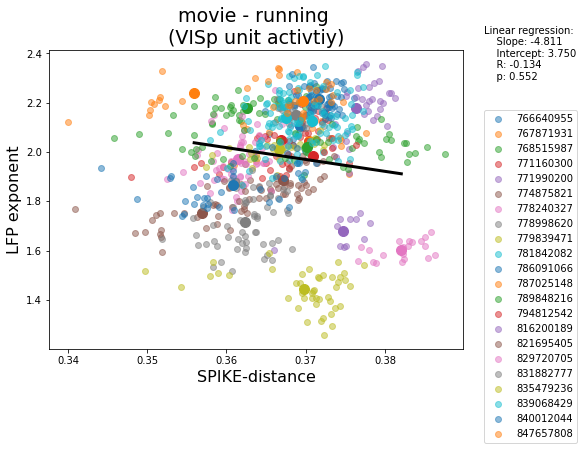

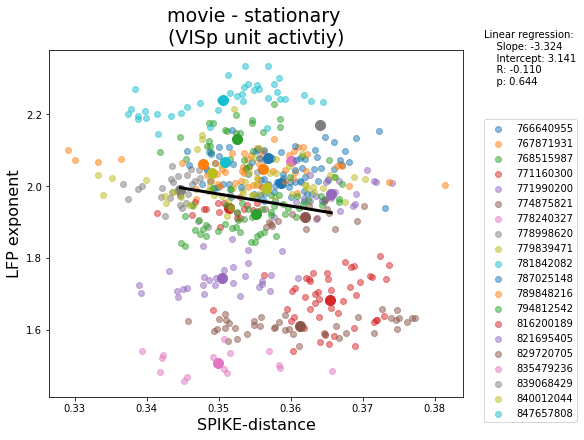

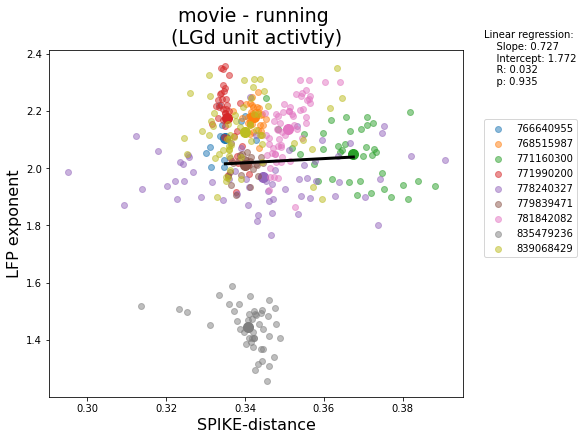

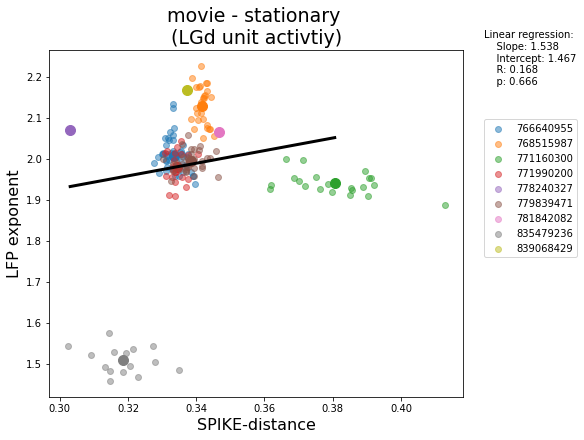

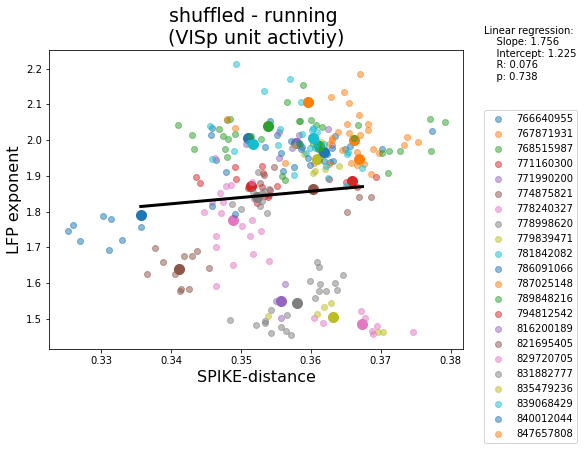

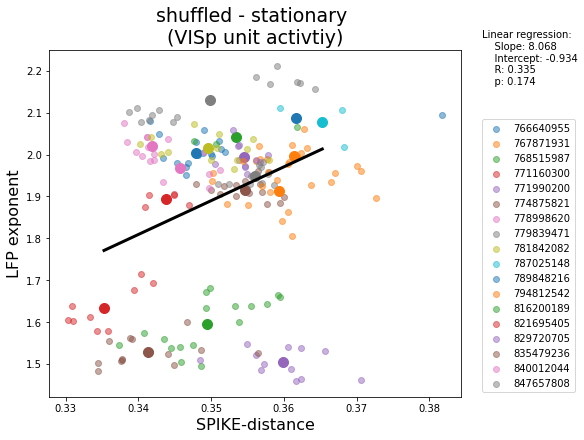

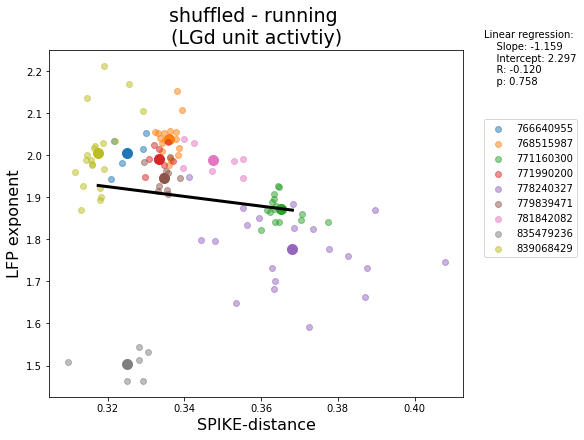

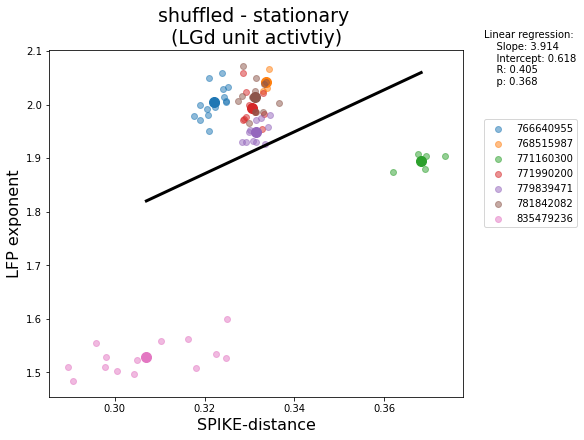

In [8]:
# loop through stimuli
for stimulus, df_lfp, df_units in zip(['movie', 'shuffled'], 
                                      [movie_lfp, shuffled_lfp],
                                      [movie_spikes, shuffled_spikes]):
    # modify df_lfp - average over channels for each epoch within each session
    df_lfp_i = df_lfp.groupby(['session', 'epoch_idx']).mean().reset_index()

    # loop through spiking region
    for spike_region in ['VISp', 'LGd']:
        # get unit data for this region
        df_units_i = df_units[df_units.get("brain_structure")==spike_region]  

        # merge unit and lfp dataframes
        df_i = df_lfp_i.merge(df_units_i, on=['session', 'epoch_idx'])

        # loop through behavioral conditions
        for behavior, running in zip(['running', 'stationary'], [True, False]):

            # filter df by behavior
            df = df_i[df_i.get('running')==running]

            # create figure
            fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
            fig.patch.set_facecolor('white')

            # plot each session
            sessions = df.get('session').unique()
            for ses in sessions:
                ses_df = df[df.get('session')==ses]

                # plot each epoch
                sc =  ax.scatter(ses_df.get('spike_distance'), 
                                 ses_df.get('exponent'), label=ses)

                # plot session mean
                ax.scatter(ses_df.get('spike_distance').mean(), 
                           ses_df.get('exponent').mean(), color=sc.get_facecolors()[0], s=100)
                sc.set_alpha(0.5)
                
            # run regression across all epochs and plot results
            df_avg = df.groupby(['session']).mean().reset_index()# average across trials
            x_data = df_avg.get('spike_distance')
            y_data = df_avg.get('exponent')
            results = sts.linregress(x_data, y_data)
            l1 = np.linspace(min(x_data), max(x_data), 1000)
            t1 = results.slope * l1 + results.intercept
            ax.plot(l1, t1, color='k', linewidth=3)

            # add regression results text
            if results.pvalue < 0.001:
                pval = f"{results.pvalue:.2e}"
            else:
                pval = f"{results.pvalue:.3f}"
            plt.text(1.05, 0.9, 
                    f"Linear regression:\n" +
                    f"    Slope: {results.slope:.3f}\n" +
                    f"    Intercept: {results.intercept:.3f}\n" +
                    f"    R: {results.rvalue:.3f}\n" +
                    f"    p: {pval}", transform = ax.transAxes)

            # label
            ax.legend(bbox_to_anchor=(1.05, .8), loc='upper left', borderaxespad=0.)
            plt.xlabel("SPIKE-distance")
            plt.ylabel("LFP exponent")
            plt.title(f"{stimulus} - {behavior} \n({spike_region} unit activtiy)")
            
            # save
            dir_figures = f"{PROJECT_PATH}/figures/exponent_vs_synchrony/{spike_region}/{behavior}"
            plt.savefig(f"{dir_figures}/all_sessions")

## ANOVA

#### merge LFP and unit results

In [35]:
# modify df_lfp - average over channels for each epoch within each session
SPIKE_REGION = 'LGd' # 'VISp'
df_lfp = movie_lfp.groupby(['session', 'epoch_idx']).mean().reset_index()

# modify df_unit - drop non-VISp rows
df_units = movie_spikes.copy()
df_units = df_units[df_units.get("brain_structure")==SPIKE_REGION]  

# merge dataframes
movie_df = df_lfp.merge(df_units, on=['session', 'epoch_idx'])

#repeat for shuffled
df_lfp = shuffled_lfp.groupby(['session', 'epoch_idx']).mean().reset_index()
df_units = shuffled_spikes.copy()
df_units = df_units[df_units.get("brain_structure")==SPIKE_REGION]    
shuffled_df = df_lfp.merge(df_units, on=['session', 'epoch_idx'])

# concat
movie_df['condition'], shuffled_df['condition'] = 'movie', 'shuffled'
df = pd.concat([movie_df, shuffled_df])
df.head()

session  epoch_idx    offset         knee  exponent  r_squared  \
0  766640955        0.0 -4.860576  1188.476113  1.938520   0.920563   
1  766640955        1.0 -4.840959   243.044655  1.958613   0.928544   
2  766640955        2.0 -4.734913   448.006152  2.018242   0.929696   
3  766640955        3.0 -4.808460   120.219652  1.976962   0.929683   
4  766640955        4.0 -4.841887   410.098697  1.968394   0.929065   

        cf_0      pw_0      bw_0        cf_1  ...  mean_firing_rate  \
0  16.315592  0.527971  4.110032   67.971192  ...          9.922368   
1  16.089610  0.408364  4.154759   77.684014  ...          9.346053   
2  20.044242  0.327437  3.952711   68.648654  ...          8.557895   
3  14.305838  0.325696  6.565642  111.696998  ...          8.419737   
4  30.627458  0.353131  4.655083   83.828503  ...          9.172368   

                                   unit_firing_rates  \
0  [2.0, 15.833333333333334, 15.366666666666667, ...   
1  [2.066666666666667, 13.866666666666667, 13.6, ...   
2  [1.7666666666666666, 13.833333333333334, 14.0,...   
3  [2.033333333333333, 13.133333333333333, 14.0, ...   
4  [2.7, 14.933333333333334, 16.733333333333334, ...   

   coefficient_of_variation  spike_distance  spike_synchrony  \
0                  1.051054        0.339492         0.168224   
1                  1.107464        0.339063         0.159532   
2                  1.114128        0.335605         0.153564   
3                  1.176187        0.334139         0.152536   
4                  1.108254        0.338484         0.162274   

                             correlation_coefficient  \
0  [[ 1.         -0.08209537 -0.07011903 ... -0.0...   
1  [[ 1.          0.1632112  -0.40520209 ...  0.1...   
2  [[ 1.         -0.10177533  0.19547559 ...  0.0...   
3  [[ 1.          0.01761615  0.26024454 ...  0.1...   
4  [[ 1.          0.23984402  0.01932491 ... -0.1...   

                                         epoch_times  running  \
0  [array(2297.21288415) * s, array(2327.21288415...    False   
1  [array(2327.23768415) * s, array(2357.23796415...    False   
2  [array(2357.26309415) * s, array(2387.26328415...    False   
3  [array(2387.28808415) * s, array(2417.28815415...    False   
4  [array(2417.31288415) * s, array(2447.31325415...    False   

   brain_structure  condition  
0              LGd      movie  
1              LGd      movie  
2              LGd      movie  
3              LGd      movie  
4              LGd      movie  

[5 rows x 29 columns]

In [32]:
# eliminate sessions without > 1 true and false running values or trials != 80
df_sessions = df
for session in df_sessions.get('session').unique():
    ses_df = df_sessions[df_sessions.get('session')==session]
    if (len(ses_df[ses_df.get('running') == True]) <= 1) | (len(ses_df[ses_df.get('running') == False]) <= 1) | (len(ses_df) != 80):
        df_sessions = df_sessions[df_sessions.get('session')!=session]

In [33]:
# loop over variables of interest
results = {}
for var in ['mean_firing_rate', 'offset', 'knee', 'exponent', 'coefficient_of_variation',
                 'spike_synchrony', 'spike_distance']:
    # run anova
    results_i = sm.stats.AnovaRM(df_sessions, var, 'session', within=['condition', 'running'], aggregate_func='mean').fit()

    # aggregate
    results[var] = results_i

    # show results
    print(f"\n\n===================  {var}  ===================\n")
    print(results_i)



===================  mean_firing_rate  ===================

                    Anova
                  F Value Num DF Den DF Pr > F
----------------------------------------------
condition          0.1452 1.0000 6.0000 0.7163
running           26.3841 1.0000 6.0000 0.0021
condition:running  3.2995 1.0000 6.0000 0.1192



===================  offset  ===================

                    Anova
                  F Value Num DF Den DF Pr > F
----------------------------------------------
condition         16.8773 1.0000 6.0000 0.0063
running           13.5722 1.0000 6.0000 0.0103
condition:running  9.1114 1.0000 6.0000 0.0234



===================  knee  ===================

                    Anova
                  F Value Num DF Den DF Pr > F
----------------------------------------------
condition          7.7559 1.0000 6.0000 0.0318
running            6.9443 1.0000 6.0000 0.0388
condition:running  6.3252 1.0000 6.0000 0.0456



===================  exponent  =================